<table class="table table-bordered">
<tr>
<th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Machine Learning</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Contents

#### 1. [HR Analytics](#part1)
   - [1.1 Load and Sample the Data](#part1.1)  
- Short summary on data cleaning and transformation processes
- Split into train and test data
   - [1.2 Build the Machine Learning Base Models](#part1.2)
- Random Forest Classifier
- XGBoost Classifier
   - [1.3 Evaluate and Improve the Models](#part1.3)
- Tuning model hyperparameters
- Selecting different input features 
- Adjusting the input data
- Other effective techniques
   - [1.4 Summarize Models](#part1.4)
- Choose best model
   
#### 2. [AirBnb](#part2)
   - [2.1 Load and Sample the Data](#part2.1)  
- Short summary on data cleaning and transformation processes
- Split into train and test data
   - [2.2 Build the Machine Learning Base Models](#part2.2)
- Random Forest Regressor
- ANN MLP Regressor
   - [2.3 Evaluate and Improve the Models](#part2.3)
- Tuning model hyperparameters
- Selecting different input features 
- Adjusting the input data
- Other effective techniques
   - [2.4 Summarize Models](#part2.4)
- Choose best model

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [3]:
import time

## 1. HR Analytics

## 1.1 Load and Sample the data

In [4]:
# Load data
hr = pd.read_csv('hr_data_new.csv')
# Show overview of the dataset
hr.head()

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_above_80pct,won_awards?,avg_training_score,good_performance,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,0,0,1,0,0.0,0.195654,5.0,-0.577225,1,0,-0.497984,0,0,1,1
1,0,16,1,1,0.0,0.000000,5.0,0.225149,1,0,-0.440835,0,0,1,1
2,0,9,2,1,0.0,1.150160,4.0,1.488471,1,0,-0.681614,0,0,0,1
3,6,1,1,1,0.0,-0.767191,3.0,-1.515579,1,1,-0.087941,1,0,0,1
4,0,1,1,1,0.0,-0.767191,3.0,-1.515579,0,0,0.042138,0,0,1,1


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department                    9336 non-null   int64  
 1   region                        9336 non-null   int64  
 2   education                     9336 non-null   int64  
 3   gender                        9336 non-null   int64  
 4   no_of_trainings               9336 non-null   float64
 5   age                           9336 non-null   float64
 6   previous_year_rating          9336 non-null   float64
 7   length_of_service             9336 non-null   float64
 8   KPIs_above_80pct              9336 non-null   int64  
 9   won_awards?                   9336 non-null   int64  
 10  avg_training_score            9336 non-null   float64
 11  good_performance              9336 non-null   int64  
 12  recruitment_channel_referred  9336 non-null   int64  
 13  rec

### Split data into train and test sets

In [6]:
df_x = hr.iloc[:, :-1]  # Features (excluding the last column 'is_promoted')
df_y = hr.iloc[:, -1] # target column
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 4)

In [7]:
#Examine dimension of sets
x_test.shape, y_test.shape, x_train.shape , y_train.shape

((1868, 14), (1868,), (7468, 14), (7468,))

In [8]:
x_train

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_above_80pct,won_awards?,avg_training_score,good_performance,recruitment_channel_referred,recruitment_channel_sourcing
2269,1,10,1,1,0.0,0.790764,1.0,1.277863,1,0,-0.043341,0,0,0
3232,0,5,1,0,0.0,1.193132,4.0,0.000000,1,0,-0.557090,0,0,0
2907,2,0,1,0,0.0,1.058607,3.0,-0.262215,1,0,0.720296,0,0,1
1944,2,4,1,0,0.0,0.000000,4.0,0.422775,1,0,0.668866,0,0,0
4396,5,5,1,0,0.0,1.193132,5.0,1.277863,1,0,1.009104,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,1,2,1,1,0.0,0.195654,4.0,-0.262215,0,1,0.407455,0,0,1
6017,3,12,1,1,0.0,-0.615810,2.0,0.000000,0,0,0.615208,0,0,0
709,3,12,2,1,0.0,-0.221776,5.0,0.422775,1,0,0.694850,0,0,0
8366,5,5,0,1,0.0,-1.107270,4.0,-0.973937,1,0,0.307435,0,0,1


In [9]:
x_test

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_above_80pct,won_awards?,avg_training_score,good_performance,recruitment_channel_referred,recruitment_channel_sourcing
5988,0,3,1,1,0.000000,0.664546,3.0,-0.262215,0,0,-0.385542,0,0,0
2145,8,4,1,1,0.000000,-0.767191,3.0,-0.973937,1,0,-0.087941,0,0,0
2624,0,0,2,1,0.000000,0.958742,4.0,-0.577225,1,0,-0.181154,0,0,1
930,0,5,1,1,0.000000,-1.107270,3.0,-1.515579,1,0,-0.681614,0,0,0
1001,1,5,1,1,0.000000,0.100801,3.0,0.599115,1,0,0.083126,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,1,12,1,1,0.000000,0.100801,5.0,0.903977,0,0,0.407455,0,0,0
3469,1,9,1,1,0.000000,-0.344112,5.0,0.000000,0,0,0.439222,0,0,0
7170,7,5,2,0,0.000000,0.849405,4.0,-0.973937,1,0,-0.959516,0,0,0
1692,3,1,1,1,1.386294,-0.475143,5.0,-0.262215,0,0,0.720296,0,0,0


In [10]:
y_test

5988    0
2145    1
2624    1
930     1
1001    1
       ..
2916    1
3469    1
7170    0
1692    1
4833    0
Name: is_promoted, Length: 1868, dtype: int64

In [11]:
y_train

2269    1
3232    1
2907    1
1944    1
4396    1
       ..
456     1
6017    0
709     1
8366    0
1146    1
Name: is_promoted, Length: 7468, dtype: int64

## 1.2 Build the Model(s)

### Ensemble - Random Forest Model

In [12]:
rf = RandomForestClassifier(random_state=1) #default params, 100 trees

rf.fit(x_train, y_train)
print('training accuracy is: ', rf.score(x_train,y_train))
print('testing accuracy is: ', rf.score(x_test,y_test))

training accuracy is:  1.0
testing accuracy is:  0.7965738758029979


In [13]:
y_pred = rf.predict(x_test) # to label the testing accuracy 

In [14]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy:
0.7965738758029979
Confusion Matrix:
[[663 273]
 [107 825]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       936
           1       0.75      0.89      0.81       932

    accuracy                           0.80      1868
   macro avg       0.81      0.80      0.80      1868
weighted avg       0.81      0.80      0.79      1868



### Interpretation:
Accuracy: Gives an overall measure of how well the model is performing across all classes. It may not be suitable for imbalanced datasets.

Precision: Indicates the accuracy of positive predictions. High precision means the model is good at not falsely labeling negatives as positives.

Recall: Measures the ability of the model to capture all positive instances. High recall means the model is good at finding all the actual positives.

F1-Score: Provides a balance between precision and recall. It's especially useful when there is an uneven class distribution, and you want to consider both false positives and false negatives.

Accuracy:

Higher is Better: Accuracy is the proportion of correctly classified instances out of the total instances. A higher accuracy indicates better overall performance. However, accuracy may not be suitable for imbalanced datasets, as it does not account for the class distribution.
Precision:

Higher is Better: Precision is the ratio of correctly predicted positive observations to the total predicted positives. A higher precision means fewer false positives. It is especially important when the cost of false positives is high.
Recall (Sensitivity or True Positive Rate):

Higher is Better: Recall is the ratio of correctly predicted positive observations to all actual positives. A higher recall means fewer false negatives. It is crucial when the cost of false negatives is high, and you want to capture as many positives as possible.
F1-Score:

Higher is Better: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1-score indicates a model that performs well in both precision and recall. It is useful when there is an uneven class distribution.

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

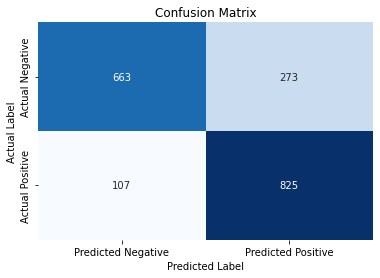

In [16]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

The number of instances that were misclassified (false positives and false negatives) in the confusion matrix are still considerably high.

The classification_report function generates a text report that includes precision, recall, F1-score, and support for each class in the classification task.

The classification report includes the following metrics for each class:

- Precision: The ratio of true positive predictions to the total predicted positives.

- Recall: The ratio of true positive predictions to the total actual positives.

- F1-score: The harmonic mean of precision and recall, providing a balanced measure.

- Support: The number of actual occurrences of each class in the specified dataset.

These evaluation metrics help you understand how well your model is performing, identify areas where it may be making mistakes, and gain insights into its strengths and weaknesses.

### Conclusion / Key Findings
* The high training accuracy suggests the model has low bias. 
* A big gap between training accuracy and testing accuracy suggest the model has high variance. 

Thus, the model is overfitted to the training data.

Model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

Upon knowing its overfitting, tuning efforts will be done to reduce the overfitting (main goal) and trying to improve the accuracy at the same time if possible

#### Next Steps
Random Forest is a bagging model that trains multiple trees in parallel, and the final output is whatever the majority of trees decide. Bagging models aims to reduce variance by training multiple independent models on bootstrap samples of the data and combining their predictions through averaging or voting.

The XG boosting algorithm creates a sequential ensemble of tree models, all of which work to improve each other and determine the final output. It focuses on improving the performance of weak learners by sequentially correcting their errors and assigning higher weights to difficult instances. Another example of boosting algorithm is AdaBoost.

**Hence, I will be trying XGBoost for my second model to test out the difference between bagging and boosting models, to also see if the overfitting issue can be improved further (even just with the base model), and ultimately decide which would be the best model after tuning with different hyperparameters as well.**

This allows me to see the difference between an example of a bagging model versus a boosting model. 

### Ensemble - XGBoost Classifier

In [17]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

print('training accuracy is: ', xgb.score(x_train,y_train))
print('testing accuracy is: ', xgb.score(x_test,y_test))

training accuracy is:  0.9393411890733797
testing accuracy is:  0.7981798715203426


In [18]:
y_pred = xgb.predict(x_test) # to label the testing accuracy 

In [19]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy:
0.7981798715203426
Confusion Matrix:
[[694 242]
 [135 797]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       936
           1       0.77      0.86      0.81       932

    accuracy                           0.80      1868
   macro avg       0.80      0.80      0.80      1868
weighted avg       0.80      0.80      0.80      1868



In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

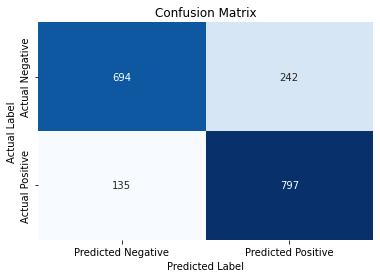

In [21]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusion / Key Findings
* The high training accuracy suggests the model has low bias. 
* A big gap between training accuracy and testing accuracy suggest the model has high variance. 

Thus, the model is overfitted to the training data.

Model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

Upon knowing its overfitting, tuning efforts will be done to reduce the overfitting (main goal) and trying to improve the accuracy at the same time if possible

### Comparison between Random Forest Base Model vs XGBoost Base Model

RF Base Model:
- training accuracy: 1.0
- testing accuracy ranges from 0.7965

XGBoost Base Model:

- training accuracy: 0.9393
- testing accuracy: 0.7981

Just by looking at the train and test accuracies of the base models of Random Forest (RF) and XGBoost (XGB), they do not have much difference. Both have high variance as they have a big difference between the train and test accuracies, with the testing accuracy being significantly lower than the training accuracy, suggesting overfitting. Tuning efforts towards XGBoost will also be focused on reducing overfitting while improving the testing and training scores at the same time if possible.

## 1.3 Evaluate and Improve the Model(s)

### Ensemble - Random Forest Model

### Feature Importance - Feature Selection

Feature importance refers to techniques that calculate a score for all the input features for a given model. The scores represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

Feature selection acts as a powerful tool to combat overfitting by identifying and retaining only the most informative and significant features for model training. By reducing the number of features, feature selection mitigates the risk of overfitting by eliminating redundant or irrelevant information.

By deselecting features with low importance, it will reduce dimensionality and speed up training and testing process. It can also enhance the generalization and robustness of your model, preventing overfitting and reducing variance.

Since I want to reduce overfitting as much as possible, I will try removing columns with least importance to see if the test accuracy increases, and allow overfitting to reduce.

https://www.linkedin.com/advice/0/how-can-feature-selection-reduce-overfitting-esfkc#:~:text=Feature%20selection%20acts%20as%20a,eliminating%20redundant%20or%20irrelevant%20information.

In [22]:
x_train.columns

Index(['department', 'region', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_above_80pct',
       'won_awards?', 'avg_training_score', 'good_performance',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [23]:
# view the feature scores
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

avg_training_score              0.246681
KPIs_above_80pct                0.145026
age                             0.108989
department                      0.101130
region                          0.099690
previous_year_rating            0.087726
length_of_service               0.087328
won_awards?                     0.028174
no_of_trainings                 0.022640
recruitment_channel_sourcing    0.021775
gender                          0.019878
education                       0.018727
good_performance                0.006595
recruitment_channel_referred    0.005641
dtype: float64

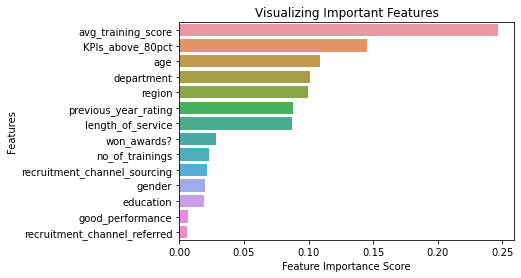

In [24]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
plt.show()

We can see that the most important feature is avg_training_score and least important feature is recruitment_channel_referred

### Base Model Without recruitment_channel_referred column

In [25]:
x_train_rcrRemoved = x_train.drop(columns=['recruitment_channel_referred'])
x_test_rcrRemoved = x_test.drop(columns=['recruitment_channel_referred'])

In [26]:
rf = RandomForestClassifier(random_state=1) #default params, 100 trees

rf.fit(x_train_rcrRemoved, y_train)
print('training accuracy is: ', rf.score(x_train_rcrRemoved,y_train))
print('testing accuracy is: ', rf.score(x_test_rcrRemoved,y_test))

training accuracy is:  0.9998660953401178
testing accuracy is:  0.7938972162740899


### Base Model Without good_performance column

In [27]:
x_train_gpRemoved = x_train.drop(columns=['good_performance'])
x_test_gpRemoved = x_test.drop(columns=['good_performance'])

In [28]:
rf = RandomForestClassifier(random_state=1) #default params, 100 trees

rf.fit(x_train_gpRemoved, y_train)
print('training accuracy is: ', rf.score(x_train_gpRemoved,y_train))
print('testing accuracy is: ', rf.score(x_test_gpRemoved,y_test))

training accuracy is:  1.0
testing accuracy is:  0.7928265524625268


### Conclusion

When I tried to remove columns that have the least importance, they had almost no difference compared to the base model. Their train accuracies are around 0.999 to 1, and test accuracies range around 0.792-0.793, which is the same range as the train and test accuracy in the base model.

From this, I have learnt that feature selection does not produce better accuracy. Due to the fact that feature selection does not work for this dataset, none of the features will be dropped in future tunings.

Next, I will be trying out RandomSearchCV to see if is able to help with overfitting.

### RandomSearch 1

RandomSearchCV has the same purpose of GridSearchCV, which are tools to find the best parameters to improve the model. 

RandomSearchCV is tried first to test my luck and whether the 'best hyperparameters' output would product a good accuracy, where  the test accuracy would increase, and allow overfitting issue to improve.

In [29]:
# Define the parameter grid
param_dist = {
    'n_estimators': (10, 100),  # Number of trees in the forest
    'max_depth': (1, 20)         # Maximum depth of the tree
}

rf = RandomForestClassifier(random_state=1) 

# Create RandomizedSearchCV instance
rand_search = RandomizedSearchCV(rf,
                                   param_distributions=param_dist,
                                   n_iter=20,  # Number of parameter settings that are sampled
                                   scoring='accuracy',  # Scoring metric
                                   cv=5,  # Cross-validation folds
                                   verbose=1,
                                   n_jobs=-1  # Use all available CPU cores
                                  )

# Fit the random search object to the data
rand_search.fit(x_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\chery\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': (1, 20),
                                        'n_estimators': (10, 100)},
                   scoring='accuracy', verbose=1)

In [30]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 100, 'max_depth': 20}


In [31]:
print('***Final Model***')
print('training acc: ', best_rf.score(x_train,y_train))
print('testing acc: ', best_rf.score(x_test,y_test))
results  = cross_validate(best_rf, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.9953133369041243
testing acc:  0.7949678800856531
cross val training accuracy is: 0.9957155134276489
cross val testing accuracy is: 0.7941299867299623


In [32]:
y_pred = best_rf.predict(x_test) # to label the testing accuracy 

In [33]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Accuracy (CV):\n{sum(results["test_score"])/len(results["test_score"])}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy:
0.7949678800856531
Accuracy (CV):
0.7941299867299623
Confusion Matrix:
[[646 290]
 [ 93 839]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       936
           1       0.74      0.90      0.81       932

    accuracy                           0.79      1868
   macro avg       0.81      0.80      0.79      1868
weighted avg       0.81      0.79      0.79      1868



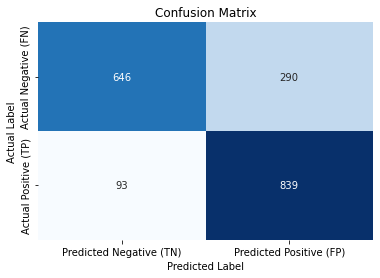

In [34]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative (TN)', 'Predicted Positive (FP)'],
            yticklabels=['Actual Negative (FN)', 'Actual Positive (TP)'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusion/Findings:

The test accuracy seems to be around 0.794, which is a slight drop from the base model's (0.796), and training accuracy reduced from 1.0 to 0.995.

Comparing the accuracies of RS 1 with the base model's, not only did the test accuracy drop, the train also dropped. Even though the drop of the train accuracy managed to reduce the variance to improve overfitting, it is still worrisome.

This means that **it is still overfitting, and further tuning and different methods of tuning should be used as RandomSearhCV was unable to help much.** 

RandomSearchCV may miss optimal configurations due to its random sampling approach, leading to less comprehensive insights into the hyperparameter space, hence wasting time as well. It is difficult to use RandomSearch to optimise the model efficiently.

GridSearch on the other hand, performs an exhaustive search over a specified grid of hyperparameters, testing all possible combinations. This allows for a thorough exploration of the hyperparameter space, and able to address overfitting,

It returns the optimal hyperparameters, and allows me to control the hyperparameters.

**GridSearch will be used over RandomSearch to mitigate overfitting and ensure optimal results and parameters in the next tuning steps.**

### GridSearchCV

Handling Overfitting:

If the model is overfitting, consider tuning parameters that control model complexity, such as max_depth, min_samples_split, and min_samples_leaf.

### GridSearch 1

In [35]:
# Grid Search

rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

start_time = time.time()

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(df_x, df_y)

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

print(gs.best_score_)
print(gs.best_params_)

Total time taken: 0.30 minutes
0.7821340789940003
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}


In [36]:
# Final Model
rf_gs1 = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=8,
                             min_samples_leaf=1,
                             max_features='auto',                             
                             random_state=1,
                             n_jobs=-1)

rf_gs1.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_gs1.score(x_train,y_train))
print('testing acc: ', rf_gs1.score(x_test,y_test))
results  = cross_validate(rf_gs1, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.7915104445634709
testing acc:  0.778372591006424
cross val training accuracy is: 0.7940231442614117
cross val testing accuracy is: 0.7821340789940003


In [37]:
y_pred = rf_gs1.predict(x_test) # to label the testing accuracy 

In [38]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Accuracy (CV):\n{sum(results["test_score"])/len(results["test_score"])}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

accuracy_diff = rf_gs1.score(x_train,y_train) - rf_gs1.score(x_test,y_test)
print(f'Train and Test Accuracy Difference:\n{accuracy_diff}')

accuracy_diff_cv = sum(results['train_score'])/len(results['train_score']) - sum(results['test_score'])/len(results['test_score'])
print(f'Train and Test Accuracy Difference (CV):\n{accuracy_diff_cv}')

Accuracy:
0.778372591006424
Accuracy (CV):
0.7821340789940003
Confusion Matrix:
[[601 335]
 [ 79 853]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       936
           1       0.72      0.92      0.80       932

    accuracy                           0.78      1868
   macro avg       0.80      0.78      0.77      1868
weighted avg       0.80      0.78      0.77      1868

Train and Test Accuracy Difference:
0.013137853557046886
Train and Test Accuracy Difference (CV):
0.011889065267411403


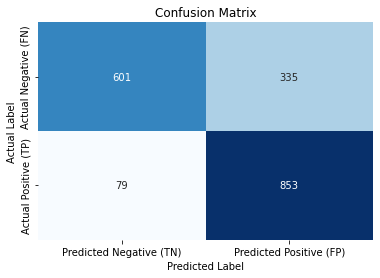

In [39]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative (TN)', 'Predicted Positive (FP)'],
            yticklabels=['Actual Negative (FN)', 'Actual Positive (TP)'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusion/Findings:

Based on the confusion matrix and classification report, it appears that this model is misclassifying some negative instances as positive. This is indicated by the lower precision (0.74) for class 0 compared to class 1 (0.89) and the lower recall (0.68) for class 0 compared to class 1 (0.92).

Comparing GS 1 with RS 1 or the Base Model's accuracies, the test accuracy has dropped, from 0.796 (base model) to 0.782 (cross val test accuracy). However, the gap between the train and test accuracies has reduced a lot, from a gap of around 0.2 (base model) to only 0.011, showing that GridSearch has helped in reducing overfitting. This is due to the big drop in train accuracy, from 1 (base) to 0.79, as seen in Fig. 2.4.10.

The drop in training accuracy after grid search suggests that the hyperparameters selected by the grid search are leading to a model that generalizes better to unseen data. This drop indicates that the model is no longer fitting the training data as closely as before, which is a desirable outcome as it improves generalization performance.

The reduction in overfitting shows that this GridSearch 1 has improved the model. However, at the expense of test and train accuracy decreasing. It is a necessary trade off to achieve reduced overfitting.


To try and get the test accuracy can improve, another GridSearch will be used to:
- increasing max_depth of trees, to allow the model to create more complex decision boundaries to capture more patterns
- increasing min_samples_leaf, to impose more constraints on tree growth and prevent model from capturing noise in data


### GridSearch 2

In [40]:
# Grid Search

rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 
              "min_samples_leaf" : [1, 5, 10, 14, 17, 20, 25], 
              "n_estimators": [10, 20, 50, 100]}

# Measure start time
start_time = time.time()

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(df_x, df_y)

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

print(gs.best_score_)
print(gs.best_params_)

Total time taken: 2.68 minutes
0.7993787053168465
{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 100}


In [41]:
# Final Model
rf_gs2 = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             max_depth=16,
                             min_samples_leaf=1,
                             max_features='auto',                             
                             random_state=1,
                             n_jobs=-1)

rf_gs2.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_gs2.score(x_train,y_train))
print('testing acc: ', rf_gs2.score(x_test,y_test))
results  = cross_validate(rf_gs2, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.9491162292447777
testing acc:  0.800321199143469
cross val training accuracy is: 0.9505409145876514
cross val testing accuracy is: 0.7993787053168465


In [42]:
y_pred = rf_gs2.predict(x_test) # to label the testing accuracy 

In [43]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Accuracy (CV):\n{sum(results["test_score"])/len(results["test_score"])}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

accuracy_diff = rf_gs2.score(x_train,y_train) - rf_gs2.score(x_test,y_test)
print(f'Train and Test Accuracy Difference:\n{accuracy_diff}')

accuracy_diff_cv = sum(results['train_score'])/len(results['train_score']) - sum(results['test_score'])/len(results['test_score'])
print(f'Train and Test Accuracy Difference (CV):\n{accuracy_diff_cv}')

Accuracy:
0.800321199143469
Accuracy (CV):
0.7993787053168465
Confusion Matrix:
[[637 299]
 [ 74 858]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       936
           1       0.74      0.92      0.82       932

    accuracy                           0.80      1868
   macro avg       0.82      0.80      0.80      1868
weighted avg       0.82      0.80      0.80      1868

Train and Test Accuracy Difference:
0.14879503010130868
Train and Test Accuracy Difference (CV):
0.15116220927080493


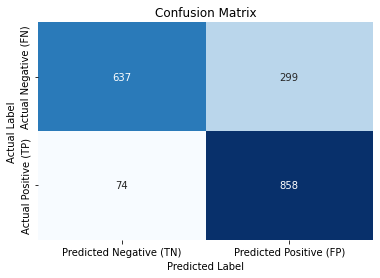

In [44]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative (TN)', 'Predicted Positive (FP)'],
            yticklabels=['Actual Negative (FN)', 'Actual Positive (TP)'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusion/Findings:

Comparing the two models:

Test Accuracy: GS 2 has a higher test accuracy (0.8003) compared to GS 1 (0.7784), indicating that GS 2 predicts the correct class more often.

Train and Test Accuracy Difference: GS 1 has a smaller difference between train and test accuracy (0.0131) compared to Model 2 (0.1488), suggesting that GS 1 has less overfitting.

Confusion Matrix: Both models have similar true positives and true negatives, but GS 2 has slightly higher true positives and true negatives.

Precision, Recall, and F1-score: GS 2 generally has higher precision, recall, and F1-scores for both classes compared to GS 1.

The adjustment of hyperparameters led to a slight improvement in the model's ability to **correctly classify true negatives and reduce false positive errors**, resulting in a **slight increase in overall accuracy**. 

Based on these comparisons, GS 2 appears to perform better overall, as it has a higher test accuracy and generally higher precision, recall, and F1-scores for both classes. 

However, it seems to that **overfitting increased**, I will try to reduce the complexity of the model by decreasing max_depth.

I would also add 'min_samples_split', a regularisation parameter, to control the minimum number of samples required to split an internal node. 

### GridSearch 3

In [45]:
# Grid Search

rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8, 10], #reduced
              "min_samples_leaf" : [1, 5, 10, 14, 17, 20, 25], #same
              "min_samples_split": [2, 3, 4 ,5], #Added for regularisation
              "n_estimators": [10, 20, 50, 100]}

# Measure start time
start_time = time.time()

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=10)
gs = gs.fit(df_x, df_y)

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
Total time taken: 5.54 minutes
0.7881324342892272
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [46]:
# Final Model
rf_gs3 = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=4,
                             max_features='auto',                             
                             random_state=1,
                             n_jobs=-1)

rf_gs3.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_gs3.score(x_train,y_train))
print('testing acc: ', rf_gs3.score(x_test,y_test))
results  = cross_validate(rf_gs3, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8181574718800214
testing acc:  0.7869379014989293
cross val training accuracy is: 0.819328446527382
cross val testing accuracy is: 0.7881324342892272


In [47]:
y_pred = rf_gs3.predict(x_test) # to label the testing accuracy 

In [48]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Accuracy (CV):\n{sum(results["test_score"])/len(results["test_score"])}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

accuracy_diff = rf_gs3.score(x_train,y_train) - rf_gs3.score(x_test,y_test)
print(f'Train and Test Accuracy Difference:\n{accuracy_diff}')

accuracy_diff_cv = sum(results['train_score'])/len(results['train_score']) - sum(results['test_score'])/len(results['test_score'])
print(f'Train and Test Accuracy Difference (CV):\n{accuracy_diff_cv}')

Accuracy:
0.7869379014989293
Accuracy (CV):
0.7881324342892272
Confusion Matrix:
[[610 326]
 [ 72 860]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       936
           1       0.73      0.92      0.81       932

    accuracy                           0.79      1868
   macro avg       0.81      0.79      0.78      1868
weighted avg       0.81      0.79      0.78      1868

Train and Test Accuracy Difference:
0.031219570381092132
Train and Test Accuracy Difference (CV):
0.031196012238154824


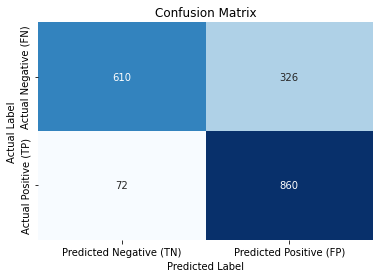

In [49]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative (TN)', 'Predicted Positive (FP)'],
            yticklabels=['Actual Negative (FN)', 'Actual Positive (TP)'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusion/Findings

Test Accuracy: GS 2 has a slightly higher test accuracy (0.8003) compared to GS 3 (0.7869/0.788 for CV), indicating that GS 2 predicts the correct class slightly more often.

Train and Test Accuracy Difference: GS 3 has a smaller difference between train and test accuracy (0.0312) compared to GS 2 (0.1488), suggesting that GS 3 is less prone to overfitting.

Confusion Matrix: Both models have similar true positives and true negatives, but GS 2 has slightly higher values.

Precision, Recall, and F1-score: GS 2 generally has slightly higher precision, recall, and F1-scores for both classes compared to GS 3.

Based on these comparisons, GS 2 has a slightly higher test accuracy, but it also exhibits a larger difference between train and test accuracy, indicating potential overfitting. GS 3, on the other hand, has a smaller difference between train and test accuracy, suggesting better generalization performance. 

However, since I am prioritising less overfitting, GS 3 is better than GS 2 despite a slightly lower test accuracy.

Comparing all 3 GridSearch done, GS 1 is the least overfitted, at only 0.0131, followed by GS 3 (0.031), and GS 2 (0.148).
As for test accuracy, the highest being GS 2 (0.8), followed by GS 3 (0.788), then GS 1 (0.782).

#### Next Steps:
To reduce overfitting, I will try to:
- Reduce the range of hyperparameters in param_grid by narrowing down the range of:
 - max_depth: Smaller values reduce the complexity of individual trees and decrease the likelihood of overfitting.
 - n_estimators: smaller number of trees can reduce overfitting, especially if the individual trees are deep and complex.
 - min_samples_leaf: Reduced because GS at the front shows that the best number for this is always 1 (quite low)
- Include additional regularization parameters such as max_features and min_impurity_decrease to control model complexity and reduce overfitting.
 - max_features:Reduce the number of features considered for splitting at each node. Potential to reduce the complexity of the trees and the likelihood of overfitting.
 - min_impurity_decrease: this threshold can prevent the tree from making splits that do not significantly reduce impurity, reducing overfitting

### GridSearch 4

In [50]:
#rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

param_grid = {  "criterion": ["gini", "entropy"],
                "max_depth": [6, 8, 10], #reduced
                "min_samples_leaf": [1, 2, 3, 4], 
              #reduced due to observations of previous best hyperparameters, to speed up process and reduce computational costs
                "min_samples_split": [2, 3, 4, 5], #remained the same
                "n_estimators": [20, 50, 100], #reduced range to reduce overfitting
                "max_features": ['sqrt', None], #Added max_features (regularisation params)
                "min_impurity_decrease": [0.01, 0.05, 0.1]  # Added min_impurity_decrease (regularisation params)
}

# Measure start time
start_time = time.time()

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=10)
gs = gs.fit(df_x, df_y)

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Total time taken: 9.24 minutes
0.7982015485916212
{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [51]:
# Final Model
rf_gs4 = RandomForestClassifier(criterion='entropy', 
                             n_estimators=20,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_features= None,                             
                             random_state=1,
                             min_impurity_decrease=0.01,
                             n_jobs=-1)

rf_gs4.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_gs4.score(x_train,y_train))
print('testing acc: ', rf_gs4.score(x_test,y_test))
results  = cross_validate(rf_gs4, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8028923406534547
testing acc:  0.7965738758029979
cross val training accuracy is: 0.8015476610590333
cross val testing accuracy is: 0.7982015485916212


In [52]:
y_pred = rf_gs4.predict(x_test) # to label the testing accuracy 

In [53]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Accuracy (CV):\n{sum(results["test_score"])/len(results["test_score"])}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

accuracy_diff = rf_gs4.score(x_train,y_train) - rf_gs4.score(x_test,y_test)
print(f'Train and Test Accuracy Difference:\n{accuracy_diff}')

accuracy_diff_cv = sum(results['train_score'])/len(results['train_score']) - sum(results['test_score'])/len(results['test_score'])
print(f'Train and Test Accuracy Difference (CV):\n{accuracy_diff_cv}')

Accuracy:
0.7965738758029979
Accuracy (CV):
0.7982015485916212
Confusion Matrix:
[[588 348]
 [ 32 900]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.63      0.76       936
           1       0.72      0.97      0.83       932

    accuracy                           0.80      1868
   macro avg       0.83      0.80      0.79      1868
weighted avg       0.84      0.80      0.79      1868

Train and Test Accuracy Difference:
0.00631846485045684
Train and Test Accuracy Difference (CV):
0.003346112467412121


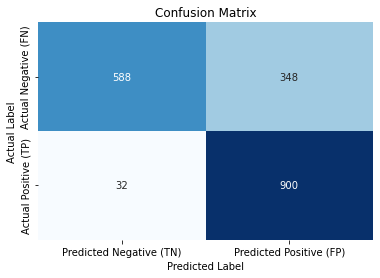

In [54]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative (TN)', 'Predicted Positive (FP)'],
            yticklabels=['Actual Negative (FN)', 'Actual Positive (TP)'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusions/Findings:

Comparing the models:

Test Accuracy: GS 4 has a higher slightly test accuracy (0.7966) compared to GS 3 (0.7869). After Cross Validation, GS 4's test accuracy is even higher, at 0.798.

Train and Test Accuracy Difference: Both models have low differences between train and test accuracy, indicating reasonable generalization performance. However, GS 4 has a smaller difference compared to GS 3, suggesting better generalization and reduced overfitting.

Confusion Matrix: GS 4 has higher precision, recall, and F1-score for both classes compared to GS 3.

Based on these comparisons, GS 4 performs better overall, as it has a higher test accuracy, lower difference between train and test accuracy, higher cross-validation accuracy, and generally better precision, recall, and F1-scores.

### 1.4. Summarize Models

**Base Model:**
    
- training accuracy is:  1.0
- testing accuracy is:  0.7965738758029979
- Difference: 0.20343
    
**RS 1:**
    
- training acc:  0.9953133369041243
- testing acc:  0.7949678800856531
- cross val training accuracy is: 0.9957155134276489
- cross val testing accuracy is: 0.7941299867299623
- Train and Test Accuracy Difference (CV): 0.201

**GS 1:**
    
- training acc:  0.7915104445634709
- testing acc:  0.778372591006424
- cross val training accuracy is: 0.7940231442614117
- cross val testing accuracy is: 0.7821340789940003
- Train and Test Accuracy Difference (CV): 0.011889065267411403
    
**GS 2:**

- training acc:  0.9491162292447777
- testing acc:  0.800321199143469
- cross val training accuracy is: 0.9505409145876514
- cross val testing accuracy is: 0.7993787053168465
- Train and Test Accuracy Difference (CV): 0.15116220927080493
    
**GS 3:**

- training acc:  0.8181574718800214
- testing acc:  0.7869379014989293
- cross val training accuracy is: 0.819328446527382
- cross val testing accuracy is: 0.7881324342892272
- Train and Test Accuracy Difference (CV): 0.031196012238154824
    
**GS 4:**

- training acc:  0.8028923406534547
- testing acc:  0.7965738758029979
- cross val training accuracy is: 0.8015476610590333
- cross val testing accuracy is: 0.7982015485916212
- Train and Test Accuracy Difference (CV): 0.003346112467412121

GS 4 has successfully **reduced the difference in the train and test accuracy to a number that I am satisfied with**, finally indicating little overfitting. Additionally, the **test accuracy has also increased**, showing that the model's generalization ability is improving and is performing better on unseen data. 

Comparing GS 4 with the other 4 above, it has the lowest difference in train and test accuracy,  indicating the least degree of overfitting. It also has higher cross validated test accuracy than GS 1 and GS 3. Although GS 4's test accuracy (0.798) is marginally lower than that of GS 2 (0.8), it's important to note that GS 2 suffers from pronounced overfitting issue, together with RS 1, as evidenced by the larger difference between train and test accuracies. Therefore, it can be concluded that GS 4 represents the optimal tuning configuration at this stage.

This tuning effectively addresses our objective of mitigating overfitting while simultaneously enhancing the model's performance, as evidenced by the improved test accuracy. GS 4 achieves the desired balance between model generalization and performance improvement, making it the final and optimal tuning selection for the Random Forest Classifier.

### Ensemble - XGBoost Model

XGBoost Base Model:

- training accuracy: 0.9393
- testing accuracy: 0.7981

### Feature Importance - feature selection

In [55]:
# view the feature scores
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

feature_scores = pd.Series(xgb.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

KPIs_above_80pct                0.409818
won_awards?                     0.139329
department                      0.129531
avg_training_score              0.080586
previous_year_rating            0.055890
length_of_service               0.023753
recruitment_channel_referred    0.022863
region                          0.022595
no_of_trainings                 0.022291
age                             0.021510
gender                          0.020646
recruitment_channel_sourcing    0.019001
education                       0.018836
good_performance                0.013350
dtype: float32

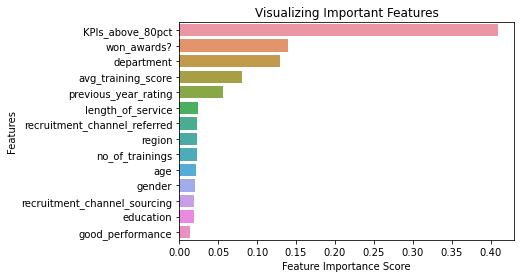

In [56]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
plt.show()

We can see that the most important feature is KPIs_above_80pct and least important feature is good_performance

### Base Model Without good_performance column

In [57]:
x_train_gpRemoved = x_train.drop(columns=['good_performance'])
x_test_gpRemoved = x_test.drop(columns=['good_performance'])

In [58]:
xgb = XGBClassifier() #default: n_est=100, learning_rate = 0.3, eval_metric = logloss
xgb.fit(x_train_gpRemoved, y_train)

print('training accuracy is: ', xgb.score(x_train_gpRemoved,y_train))
print('testing accuracy is: ', xgb.score(x_test_gpRemoved,y_test))

training accuracy is:  0.9345206213176218
testing accuracy is:  0.7965738758029979


### Conclusion / Findings:

Base Model:
- training acc: 0.9393
- testing acc: 0.7981
- Difference in train and test accuracy is 0.1412.

The difference between the train and test accuracy has reduced (0.13795), indicating lesser overfitting. 

However, it is important to note that **even though overfitting has improved, both train and test accuracy dropped slightly**, suggesting that the model's ability to capture the underlying patterns in the data has been compromised. While the reduction in overfitting is a positive outcome, it appears that the model has become less effective in distinguishing between classes or making accurate predictions on both the training and test datasets. Hence, I would not choose to drop this column, as the test accuracy became worse and the improvement in the overfitting is minimal.

## GridSearchCV

### GridSearch 1

Some parameters that helps with overfitting will be tried.

n_estimators: Controls the number of boosting rounds or trees in the ensemble. Each additional tree adds complexity to the model and can potentially lead to overfitting, especially if the dataset is small or noisy. By reducing the number of trees (n_estimators), you limit the model's capacity to memorize noise or outliers in the training data, thus reducing the risk of overfitting.

max_depth: This parameter controls the maximum depth of the individual trees. Reducing max_depth can prevent the trees from becoming too complex and overfitting the training data.

learning_rate: This parameter controls the learning rate of the algorithm. Reducing learning_rate can slow down the learning process and help prevent overfitting by making smaller updates to the model parameters.

In [59]:
# Grid Search

xgb = XGBClassifier()

param_grid = {  'n_estimators': [10, 20, 30, 40, 50],
                'max_depth': [2, 4, 6, 8, 10],
                'learning_rate': [0.01, 0.1, 0.3],
                'eval_metric': ['logloss']
}

start_time = time.time()

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(df_x, df_y)

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

print(gs.best_score_)
print(gs.best_params_)

Total time taken: 27.10 minutes
0.8179100780030485
{'eval_metric': 'logloss', 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 30}


In [60]:
# Final Model
xgb_gs1 = XGBClassifier(n_estimators=30,
                        learning_rate=0.3,
                        max_depth=4,
                        eval_metric='logloss')

xgb_gs1.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', xgb_gs1.score(x_train,y_train))
print('testing acc: ', xgb_gs1.score(x_test,y_test))
results  = cross_validate(xgb_gs1, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8311462238885913
testing acc:  0.8126338329764454
cross val training accuracy is: 0.8333600951420486
cross val testing accuracy is: 0.8179100780030485


In [61]:
y_pred = xgb_gs1.predict(x_test) # to label the testing accuracy 

In [62]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Accuracy (CV):\n{sum(results["test_score"])/len(results["test_score"])}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

accuracy_diff = xgb_gs1.score(x_train,y_train) - xgb_gs1.score(x_test,y_test)
print(f'Train and Test Accuracy Difference:\n{accuracy_diff}')

accuracy_diff_cv = sum(results['train_score'])/len(results['train_score']) - sum(results['test_score'])/len(results['test_score'])
print(f'Train and Test Accuracy Difference (CV):\n{accuracy_diff_cv}')

Accuracy:
0.8126338329764454
Accuracy (CV):
0.8179100780030485
Confusion Matrix:
[[643 293]
 [ 57 875]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       936
           1       0.75      0.94      0.83       932

    accuracy                           0.81      1868
   macro avg       0.83      0.81      0.81      1868
weighted avg       0.83      0.81      0.81      1868

Train and Test Accuracy Difference:
0.01851239091214585
Train and Test Accuracy Difference (CV):
0.015450017139000072


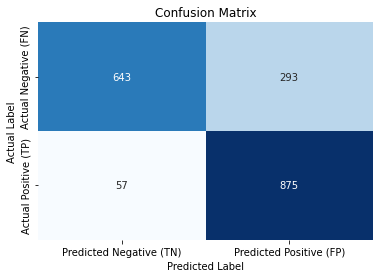

In [63]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative (TN)', 'Predicted Positive (FP)'],
            yticklabels=['Actual Negative (FN)', 'Actual Positive (TP)'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusion/Findings:

Test Accuracy: Model from GS1 has a higher/increased test accuracy (0.8126) compared to the Base Model (0.7982), indicating a more robust performance.The cross validated test accuracy is even higher, at 0.817.

Confusion Matrix: Model from Grid Search (GS1) has higher precision, recall, and F1-score for both classes compared to the base XGBoost model.

The difference in the train and test accuracy also reduced, from 0.1412 (base model) to 0.0185 and 0.0154 in GS 1, improving the slight overfitting issue.


Although there is a drop in train accuracy from around 0.93 to around 0.83 (GS 1), the decrease in training accuracy is a trade-off for improved generalization and reduced overfitting.

Based on these comparisons, the model obtained from Grid Search (GS1) outperforms the base XGBoost model in terms of test accuracy, cross-validation accuracy, lower difference in train and test accuracies, and precision, recall, and F1-scores. Therefore, the parameters in GS 1 is preferred.

#### Next Steps:

Since the overfitting is little to no more, I would focus on trying to improve both train and test accuracies, while maintaining the train and test accuracy difference. This is to ensure that the model generalizes well to unseen data while also performing well on the training data. This would be done by:
- Experimenting with different values for max_depth, learning_rate, n_estimators
- Adding parameters related to regularization such as gamma and min_child_weight to control overfitting.

### GridSearch 2

In [64]:
# Grid Search

xgb = XGBClassifier(eval_metric='logloss')

param_grid = {'n_estimators': [20, 30, 35, 38, 40], #adjusted
    'max_depth': [2, 3, 4, 5], #adjusted, made it lower
    'learning_rate': [0.01, 0.1, 0.3, 0.4], #added 0.4
    'gamma': [0, 0.1, 0.2, 0.3], # Values for gamma (minimum loss reduction)
    'min_child_weight': [2,4,6],
}

start_time = time.time()

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs = gs.fit(df_x, df_y)

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

print(gs.best_score_)
print(gs.best_params_)

C:\Users\chery\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Total time taken: 2.86 minutes
0.8200514629729243
{'gamma': 0.2, 'learning_rate': 0.3, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 38}


In [65]:
# Final Model
xgb_gs2 = XGBClassifier(n_estimators=38,
                        learning_rate=0.3,
                        max_depth=4,
                        gamma=0.2,
                        min_child_weight=6, #basically its the default, so there wont be much change
                        eval_metric='logloss')

xgb_gs2.fit(x_train, y_train)

print('***Final Model***')
print('training acc: ', xgb_gs2.score(x_train,y_train))
print('testing acc: ', xgb_gs2.score(x_test,y_test))
results  = cross_validate(xgb_gs2, df_x, df_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8389126941617568
testing acc:  0.8174518201284796
cross val training accuracy is: 0.8365467212702702
cross val testing accuracy is: 0.8200514629729243


In [66]:
y_pred = xgb_gs2.predict(x_test) # to label the testing accuracy 

In [67]:
# Evaluation: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#The simplest way to evaluate this model is using accuracy; 
#we check the predictions against the actual values in the test set and count up how many the model got right.
print(f'Accuracy:\n{accuracy}')
print(f'Accuracy (CV):\n{sum(results["test_score"])/len(results["test_score"])}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

accuracy_diff = xgb_gs2.score(x_train,y_train) - xgb_gs2.score(x_test,y_test)
print(f'Train and Test Accuracy Difference:\n{accuracy_diff}')

accuracy_diff_cv = sum(results['train_score'])/len(results['train_score']) - sum(results['test_score'])/len(results['test_score'])
print(f'Train and Test Accuracy Difference (CV):\n{accuracy_diff_cv}')

Accuracy:
0.8174518201284796
Accuracy (CV):
0.8200514629729243
Confusion Matrix:
[[652 284]
 [ 57 875]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       936
           1       0.75      0.94      0.84       932

    accuracy                           0.82      1868
   macro avg       0.84      0.82      0.81      1868
weighted avg       0.84      0.82      0.81      1868

Train and Test Accuracy Difference:
0.021460874033277233
Train and Test Accuracy Difference (CV):
0.016495258297345883


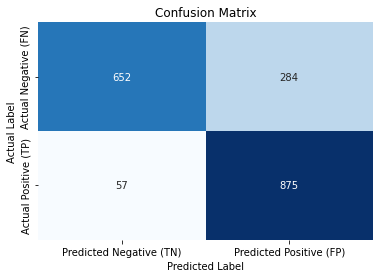

In [68]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative (TN)', 'Predicted Positive (FP)'],
            yticklabels=['Actual Negative (FN)', 'Actual Positive (TP)'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### Conclusion / Key findings

Accuracy:

GS 2 has slightly higher accuracy for both training (0.8389) and testing (0.8175) compared to GS 1 (0.8311 for training and 0.8126 for testing). GS 2 also has higher cross-validated accuracy for both training (0.8365) and testing (0.8201) compared to GS 1 (0.8334 for training and 0.8179 for testing).

Confusion Matrix and Classification Report:

Both models have similar confusion matrices and classification reports, indicating similar performance in terms of precision, recall, and F1-score for both classes.

Train and Test Accuracy Difference (CV):

The train and test accuracy difference (CV) is slightly higher for GS 2 (0.0165) compared to GS 1 (0.0155), indicating a slightly higher degree of overfitting in GS 2. 

Overall, GS 2 performs slightly better in terms of accuracy for both training and testing sets and also has slightly higher cross-validated accuracy. However, it exhibits a slightly higher degree of overfitting compared to GS 1.

However, the increase in accuracy difference is very little, and would not necessarily be considered overfitted. Hence, GS 2 is a better and improved model. 

### 1.4. Summarize Models

**Base Model:**
- training acc: 0.9393
- testing acc: 0.7981
- Train and Test Accuracy Difference: 0.1412

**GS 1:**
- training acc:  0.8311462238885913
- testing acc:  0.8126338329764454
- cross val training accuracy is: 0.8333600951420486
- cross val testing accuracy is: 0.8179100780030485
- Train and Test Accuracy Difference (CV): 0.015450017139000072
    
**GS 2:**
- training acc:  0.8389126941617568
- testing acc:  0.8174518201284796
- cross val training accuracy is: 0.8365467212702702
- cross val testing accuracy is: 0.8200514629729243
- Train and Test Accuracy Difference (CV): 0.016495258297345883

At the start, the purpose of tuning this model is the reduce the train and test accuracy difference to reduce overfitting, and at the same time increase the test accuracy if possible.

Comparing all the models together, GS 2 has the best hyperparameter combinations. As mentioned earlier, GS 2 is better compared to GS 1 as the cross validated train and more importantly, test accuracy, has increased, suggesting improvement in prediction. 

GS 2 demonstrated significant improvements in test accuracy, escalating from 0.7981 in the base model to 0.82. Although there was a marginal decline in train accuracy, decreasing from 0.9393 in the base model to 0.836 in GS 2, this reduction is regarded as a worthwhile trade-off. This trade-off was essential to address overfitting concerns, thereby enabling the model to generalize more effectively to novel, unseen data. In essence, GS 2 achieved a balance between minimizing overfitting and optimizing predictive performance, ultimately leading to superior test accuracy and improved model robustness. 

## 2. Airbnb

### 2.1 Load and Sample the data

In [69]:
# Load data
listings = pd.read_csv('listings_new.csv')
# Show overview of the dataset
listings.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,near_amenities,name_length,price
0,131,1,0.896522,0.578065,0.185608,-0.671031,0.262272,1,-0.536246,81.0
1,470,1,0.590371,0.578065,0.114405,0.398299,0.181909,0,0.764489,44.0
2,470,1,0.743611,0.442355,-0.094310,0.398299,0.042908,1,-0.194594,40.0
3,134,1,-0.193267,0.810679,0.823269,-0.134335,0.193970,1,-0.587071,65.0
4,470,1,0.743611,0.505309,-0.017948,0.398299,0.203556,0,-0.373309,44.0


In [70]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6309 non-null   int64  
 1   room_type                       6309 non-null   int64  
 2   minimum_nights                  6309 non-null   float64
 3   number_of_reviews               6309 non-null   float64
 4   reviews_per_month               6309 non-null   float64
 5   calculated_host_listings_count  6309 non-null   float64
 6   availability_365                6309 non-null   float64
 7   near_amenities                  6309 non-null   int64  
 8   name_length                     6309 non-null   float64
 9   price                           6309 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 493.0 KB


### Split the data

In [71]:
X = listings.iloc[:, :-1]  # Features (excluding the last column, which is the target column, 'price')
Y = listings.iloc[:, -1] # target column

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [72]:
#Examine dimension of sets
X_test.shape, Y_test.shape, X_train.shape , Y_train.shape

((1262, 9), (1262,), (5047, 9), (5047,))

In [73]:
X_train

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,near_amenities,name_length
6221,994,2,0.000000,-0.557645,-0.349826,0.877975,0.262272,1,0.764489
6289,362,2,0.743611,-0.557645,-0.349826,0.165828,-0.253314,0,0.764489
824,136,2,-0.193267,0.810679,1.031213,-0.485556,-0.559752,0,-1.143823
2687,1043,1,0.743611,-0.557645,-0.349826,-0.671031,0.045550,0,0.210567
749,428,1,-0.526072,-0.182362,-0.297592,-0.671031,-1.302013,0,-0.536246
...,...,...,...,...,...,...,...,...,...
1099,537,1,0.000000,-0.182362,-0.272533,-0.671031,-1.302013,0,-0.315495
2514,171,2,0.353215,0.465657,0.464836,-0.083153,-0.679107,1,0.597242
3606,428,2,0.743611,-0.557645,-0.349826,0.877975,0.215462,0,0.437194
5704,470,2,0.743611,-0.557645,-0.349826,0.388950,0.079475,1,0.068410


In [74]:
Y_train

6221    199.0
6289    160.0
824     210.0
2687    100.0
749     103.0
        ...  
1099     92.0
2514    156.0
3606    310.0
5704    112.0
2575    199.0
Name: price, Length: 5047, dtype: float64

In [75]:
X_test

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,near_amenities,name_length
1281,477,0,-0.526072,0.686295,0.645327,-0.083153,0.248362,0,0.437194
4211,1043,1,0.635945,-0.557645,-0.349826,0.737288,0.248362,1,-0.315495
4232,428,2,0.223452,0.197151,0.432108,-0.671031,-1.122957,0,-1.000584
4927,428,2,0.895385,-0.557645,-0.349826,0.496366,0.005432,0,0.679965
4005,477,1,0.896522,-0.557645,-0.349826,0.661543,0.241365,0,0.679965
...,...,...,...,...,...,...,...,...,...
4280,994,2,0.000000,0.000000,0.348857,0.205488,-0.507946,0,-1.143823
2647,101,2,0.473928,0.465657,0.523669,0.605364,0.069116,0,-0.194594
2906,134,1,0.743611,0.000000,-0.055185,0.143781,-0.577720,1,0.138597
2037,477,2,0.295645,0.351038,0.185608,0.285694,0.071713,1,0.516320


In [76]:
Y_test

1281     35.0
4211     44.0
4232    169.0
4927    135.0
4005     75.0
        ...  
4280    199.0
2647    206.0
2906     87.0
2037    381.0
5748    219.0
Name: price, Length: 1262, dtype: float64

### 2.2 Build the Model(s)

### Ensemble - Random Forest Regressor

In [77]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(random_state=1)  
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(X_train, Y_train.ravel()) 

RandomForestRegressor(random_state=1)

In [78]:
print('the training mean squared error is: ', mean_squared_error(rf_reg.predict(X_train), Y_train))
print('the testing mean squared error is: ', mean_squared_error(rf_reg.predict(X_test), Y_test))

# Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, rf_reg.predict(X_train))
test_r2 = r2_score(Y_test, rf_reg.predict(X_test))

print('the training R^2 score is: ', train_r2)
print('the testing R^2 score is: ', test_r2)

the training mean squared error is:  544.4172026951763
the testing mean squared error is:  3650.5286064526817
the training R^2 score is:  0.9420334597220299
the testing R^2 score is:  0.619087709639752


The smaller the MSE, the better the accuracy. 
The closer the r^2 value is to 1, the better the accuracy.

In [79]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf_reg, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-519.9505549  -539.78631372 -533.65789251 -522.63055426 -543.04712854]
test_score:  [-4476.91301898 -4514.0393151  -4701.19098246 -5256.60291978
 -4948.58732612]
cross val training mean_squared_error is: 531.8144887832229
cross val testing mean_squared_error is: 4779.466712487998


#### Residual Plot

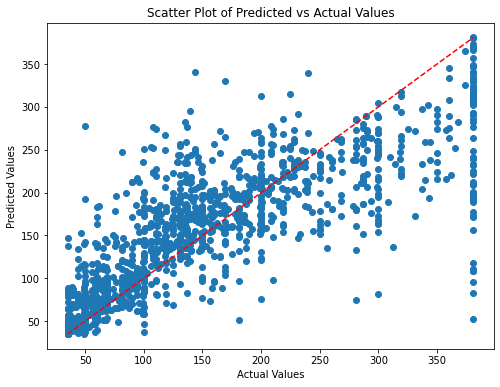

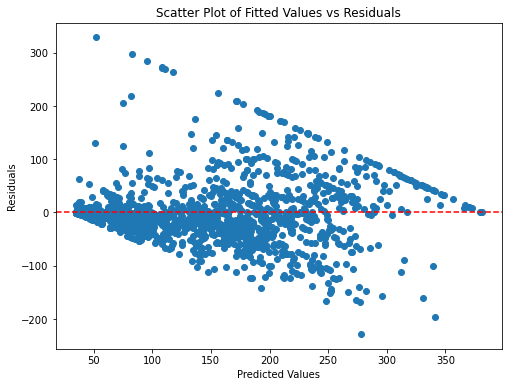

In [80]:
residuals = Y_test - rf_reg.predict(X_test)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_reg.predict(X_test))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_reg.predict(X_test), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Base Model Conclusion / Findings:

- From the train and test MSE scores, the train MSE seem to be alot lower than the test MSE (4779), with the test MSE (531) having a score of 9x of the train MSE. (cross validated)
- From the train and test r^2 scores, the train is at 0.94, while the test is only 0.619.
- Suggests that the model has high variance and low bias, which is characteristic of overfitting. 

Tuning efforts will be trying to reduce the overfitting as much as possible to an acceptable degree, and improving the test accuracy at the same time.

#### Next Steps

Random Forest (RF) Regressor and Artificial Neural Networks (ANNs), specifically Multilayer Perceptrons (MLPs), are two distinct machine learning algorithms used for regression tasks. RF Regressor is an ensemble learning method based on decision trees, where multiple decision trees are built during training and their predictions are averaged to obtain the final output. In contrast, ANNs, particularly MLPs, consist of multiple layers of interconnected neurons, each performing weighted summations followed by activation functions to generate predictions. 

One key difference lies in their inherent structures and mechanisms: RF Regressor relies on a collection of decision trees operating independently, while MLPs utilize interconnected layers of neurons that pass information through a series of nonlinear transformations. Additionally, RF Regressor tends to be more interpretable due to its reliance on decision trees, whereas MLPs are often considered as black-box models due to their complex architectures. 

Because of the difference in how they work, I will be trying out MLP Regressor for the second model.

### ANN - MLP

In terms of prediction, RF Regressor may perform better with smaller datasets or when the relationship between features and target variables is non-linear but with a limited number of interactions, while MLPs are capable of capturing intricate patterns and relationships in large and complex datasets, making them suitable for tasks with high-dimensional inputs and complex non-linear relationships. 

In [81]:
mlp = MLPRegressor(random_state  = 1)
mlp.fit(X_train,Y_train.ravel())

MLPRegressor(random_state=1)

In [82]:
print('training mean squared error: ', mean_squared_error(mlp.predict(X_train), Y_train))
print('testing mean squared error: ', mean_squared_error(mlp.predict(X_test), Y_test))

#Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, mlp.predict(X_train))
test_r2 = r2_score(Y_test, mlp.predict(X_test))

print('the training R^2 score is: ', train_r2)
print('the testing R^2 score is: ', test_r2)

training mean squared error:  5994.866250025579
testing mean squared error:  5971.7384633450665
the training R^2 score is:  0.36169971444175697
the testing R^2 score is:  0.3768824132799897


In [83]:
#Evaluate the Model using K-folds Cross validation
results  = cross_validate(mlp, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training mean squared error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean squared error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-5987.34902403 -5940.71068541 -5836.45787142 -5466.95919673
 -5771.18611546]
test_score:  [-5213.73257861 -5268.69942251 -5735.19345074 -6947.29349596
 -6289.18791095]
cross val training mean squared error is: 5800.532578611467
cross val testing mean squared error is: 5890.821371756194


#### Residual Plots

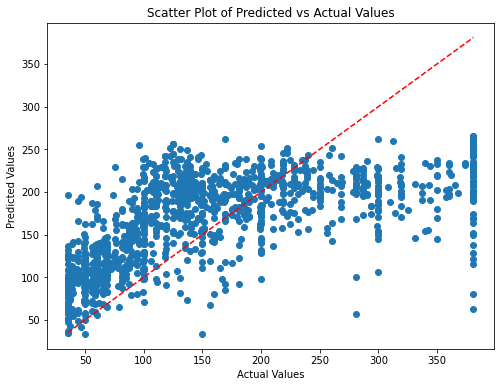

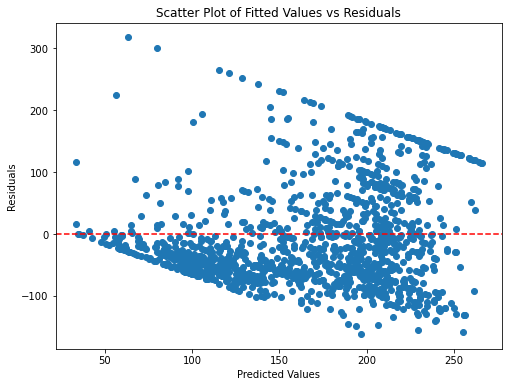

In [84]:
residuals = Y_test - mlp.predict(X_test)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, mlp.predict(X_test))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(mlp.predict(X_test), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

Scatter Plot of Predicted vs Actual Values:

The x-axis represents the predicted values by the model, while the y-axis represents the actual observed values in the dataset. Ideally, points should lie along a diagonal line, indicating perfect agreement between predicted and actual values.

Explanation: If points cluster closely around the diagonal line, it suggests that the model's predictions align well with the actual values, indicating a good fit. However, if points are scattered widely away from the diagonal line, it indicates discrepancies between predicted and actual values, suggesting potential issues with the model's performance.

Scatter Plot of Fitted Values vs Residuals:

If points are randomly scattered around the horizontal line at y = 0, with no clear pattern or trend, it indicates that the model's errors are random and unbiased. This suggests that the model is making consistent predictions across the range of fitted values. However, if there is a pattern or trend in the residuals (e.g., funnel shape, heteroscedasticity), it suggests that the model's errors are not consistent across the range of fitted values, indicating potential issues with model assumptions or performance.

### Base model conclusion 

- The train and test MSEs although considerably high, at 5994 and 5971 respectively, they do not have much differnece,  suggesting a similar performance of the model on unseen data compared to the training data. This is a good sign.
- Notably, the cross-validated MSE values, at 5800 and 5890 for the training and testing sets respectively, show an improvement over the initial MSEs.
- Importantly, analyzing the R^2 score, they are very low, at 0.36 for train, and 0.376 for test. 
- A good thing is that the difference between the R^2 scores are extremely low (0.015), indicating that there is no overfitting, which is a very common issue.

A crucial aspect to consider is the low R-squared (R^2) scores, measuring 0.36 for the training set and 0.376 for the testing set. While the difference between these R^2 scores is minimal (0.015), indicative of reduced overfitting risk, the overall low values may suggest underfitting. This underfitting possibility is further supported by the high and comparable MSEs across both datasets.

#### Residual Plots:
- From both plot, I can tell that the model is not performing well.
- The predicted values vs actual values plot shows that most of the points are not along the diagonal line, especially from 200 onwards.
- The residual plot shows a cone-shaped pattern, where the spread of residuals are widening as the predicted values increase, indicating heteroscedasticity, which can lead to biased parameter estimates and incorrect inferences. There's a slight downward trend, which is not a good sign.

#### Next Steps:

This model's performance could be improved to better capture the underlying patterns in the data. 

Tuning efforts will be done to improve the train and test accuracies (R^2) to, while maintaining the low difference, to ensure no overfitting.

### 2.3 Evaluate and Improve the Model(s)

### Ensemble - Random Forest Regressor

### Feature Importance - feature selection

In [85]:
X_train.columns

Index(['neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'near_amenities', 'name_length'],
      dtype='object')

In [86]:
# Instantiate the random forest regressor
rf_reg = RandomForestRegressor()

# Fit the random forest regressor to your training data
rf_reg.fit(X_train, Y_train)

# View the feature importances
feature_importances = pd.Series(rf_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_importances)

room_type                         0.324263
availability_365                  0.139053
neighbourhood                     0.114015
calculated_host_listings_count    0.111638
name_length                       0.091168
minimum_nights                    0.083334
reviews_per_month                 0.065491
number_of_reviews                 0.056386
near_amenities                    0.014653
dtype: float64


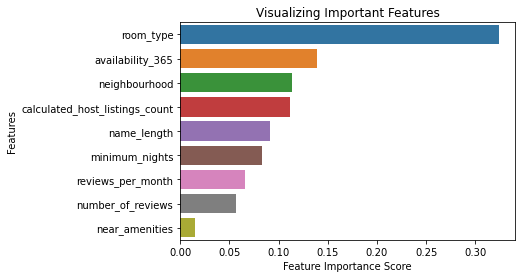

In [87]:
# Creating a seaborn bar plot

sns.barplot(x=feature_importances, y=feature_importances.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
plt.show()

We can see that the most important feature is room_type and least important feature is near_amenities

### Base Model Without near_amenities (BMW)

In [88]:
X_train_aRemoved = X_train.drop(columns=['near_amenities'])
X_test_aRemoved = X_test.drop(columns=['near_amenities'])

In [89]:
# Instantiate the random forest regressor
rf_reg = RandomForestRegressor(random_state=1)

# Fit the random forest regressor to your training data
rf_reg.fit(X_train_aRemoved, Y_train)

RandomForestRegressor(random_state=1)

In [90]:
print('the training mean squared error is: ', mean_squared_error(rf_reg.predict(X_train_aRemoved), Y_train))
print('the testing mean squared error is: ', mean_squared_error(rf_reg.predict(X_test_aRemoved), Y_test))

# Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, rf_reg.predict(X_train_aRemoved))
test_r2 = r2_score(Y_test, rf_reg.predict(X_test_aRemoved))

# Calculate the difference between train and test R^2 scores
r2_score_difference = train_r2 - test_r2

print('R^2 scores difference: ', r2_score_difference)

print('the training R^2 score is: ', train_r2)
print('the testing R^2 score is: ', test_r2)

the training mean squared error is:  548.1456166038348
the testing mean squared error is:  3568.021275094838
R^2 scores difference:  0.31393958949696144
the training R^2 score is:  0.9416364787781155
the testing R^2 score is:  0.6276968892811541


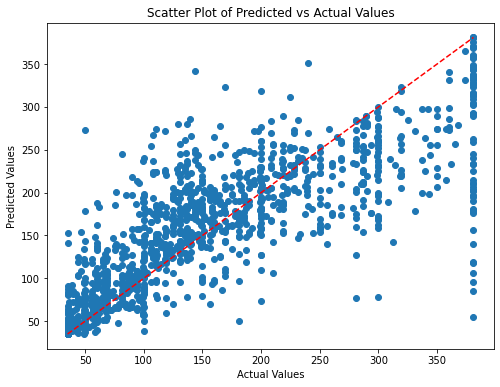

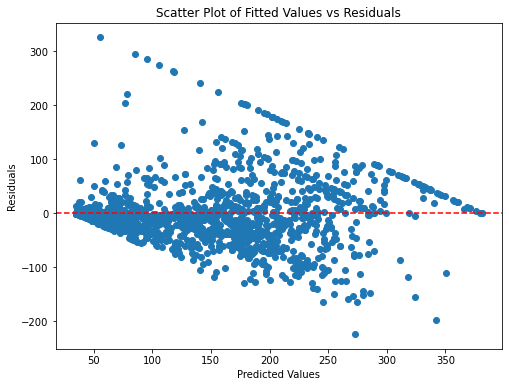

In [91]:
residuals = Y_test - rf_reg.predict(X_test_aRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_reg.predict(X_test_aRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_reg.predict(X_test_aRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Findings

The model with one column removed has a slightly higher training MSE (548.15 vs. 544.42) but a lower testing MSE (3568.02 vs. 3650.53) compared to the base model. This suggests that removing the least important column has a minor impact on the training MSE but improves the model's generalization performance, as indicated by the lower testing MSE.

When 'near_amenities' is removed, it has a slightly lower training R^2 score (0.9416 vs. 0.9420) but a higher testing R^2 score (0.6277 vs. 0.6191) compared to the base model. This indicates that removing the least important column leads to a marginal decrease in the model's performance on the training data but an improvement in its ability to explain the variance in the testing data. 

Overall, removing the least important column from the base Random Forest Regressor model results in a minor trade-off between training and testing performance. While there is a slight decrease in the training performance metrics, the model's generalization performance improves, as evidenced by the improvements in the testing performance metrics (lower MSE and higher R^2 score). 

Additionally, the difference in the train and test accuracy (r^2) has also reduced slightly, meaning overfitting has improved.Therefore, removing the least important column may lead to a more robust and better-performing model in terms of generalization to unseen data. 

I will **move on with further tuning efforts to reduce overfitting and increasing the test accuracy without 'near_amenities', as it improved the test accuracy and overfitting.**

### Parameter Focus 1 (PF1) - max depth

Instead of tuning multiple parameters using grid search, this time we will be only tuning one parameter (i.e. max_depth) to reduce overfitting

In [92]:
# Setting max_depth from 2 to 9 (8 different values)
# Training & evaluating the model 8 times with different max_depth value
# Store both simple split measures (train_mse & test_mse) and 
# cross validation measures (cross_val_train_mse & cross val_test_mse) into arrays

depth_range = range(2,15)

train_mse = []
test_mse = []
#cross_val_train_mse =[]
#cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=d,random_state=1)
    rf_reg.fit(X_train_aRemoved, Y_train.ravel()) 
    train_mse.append(mean_squared_error(rf_reg.predict(X_train_aRemoved), Y_train))
    test_mse.append(mean_squared_error(rf_reg.predict(X_test_aRemoved), Y_test))

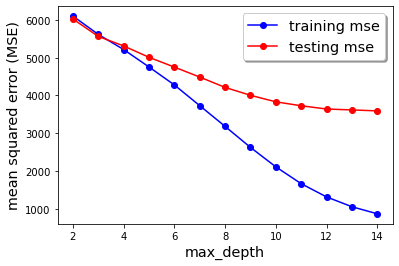

In [93]:
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

From the above figures, we can see that:
- Both the training MSE and testing MSE decrease rapidly as the model learns from the training data.
- From `max_depth` 8, the testing MSE starts to plateau, which is a sign of overfitting.

Therefore, we think the ideal `max_depth` is around 9. Now let's build the model using `max_depth = 9`.

In [94]:
# Create Random Forest Model
rf_reg_md = RandomForestRegressor(random_state=1, max_depth=9)  #max depth = 9
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg_md.fit(X_train_aRemoved, Y_train.ravel()) 

RandomForestRegressor(max_depth=9, random_state=1)

In [95]:
print('the training mean squared error is: ', mean_squared_error(rf_reg_md.predict(X_train_aRemoved), Y_train))
print('the testing mean squared error is: ', mean_squared_error(rf_reg_md.predict(X_test_aRemoved), Y_test))

# Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, rf_reg_md.predict(X_train_aRemoved))
test_r2 = r2_score(Y_test, rf_reg_md.predict(X_test_aRemoved))

# Calculate the difference between train and test R^2 scores
r2_score_difference = train_r2 - test_r2

print('R^2 scores difference: ', r2_score_difference)
print('the training R^2 score is: ', train_r2)
print('the testing R^2 score is: ', test_r2)

the training mean squared error is:  2624.440611575936
the testing mean squared error is:  4005.0303136614534
R^2 scores difference:  0.13846660771992014
the training R^2 score is:  0.7205640423099644
the testing R^2 score is:  0.5820974345900443


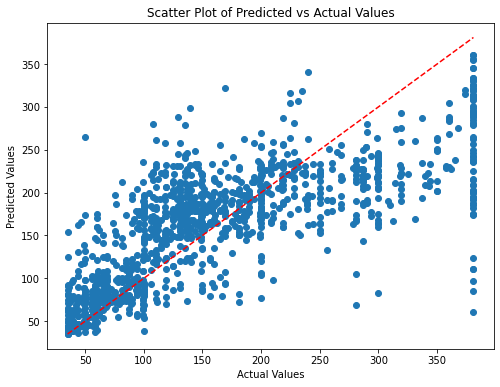

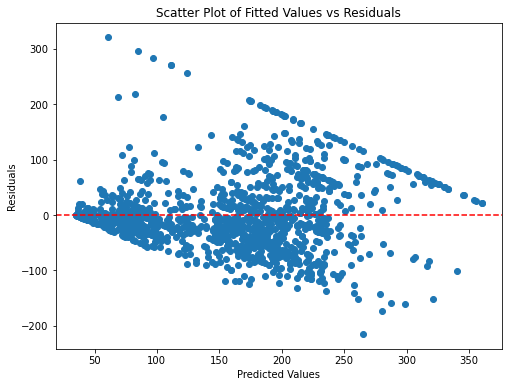

In [96]:
residuals = Y_test - rf_reg_md.predict(X_test_aRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_reg_md.predict(X_test_aRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_reg_md.predict(X_test_aRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Key findings:

I decided to focus on max_depth parameter, in hopes of reducing the overfitting issue.
- The train accuracy of r^2 metric dropped, from 0.941 (base model after remove column) to 0.72 after tuning max_depth. The test accuracy, however, dropped from 0.627 to 0.582. 
- The significant drop in the train r^2 caused the overfitting issue to be improved, as the difference in the train and test of r^2 went from 0.313 to only 0.138, although it still can be improved further.
- The train and test MSE became 2k+ and 4k+ respectively, hence the low test and high train MSE suggests there still overfitting.
- Overfitting have been reduced, but still exists, and requires further tuning.

#### Next steps:
I will be trying to reduce overfitting using GridSearch, by adding regularisation parameters. 

Additionally, because I have established max_depth to be best at 9, I will keep max_depth at 9:
- max_depth will be kept the same, 9
- n_estimators
- min_sample_split
- min_sample_leaf

### GridSearch 1 (GS 1)

In [97]:
# Define the parameter grid to search

# Create a base model
rf_reg = RandomForestRegressor(random_state=1)

param_grid = {
    'max_depth': [9],
    'n_estimators': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 8],
    'max_features': ['auto', 'sqrt', 0.5],  # options for max_features
    'bootstrap': [True, False]  # options for bootstrap
}

start_time = time.time()

# Instantiate the grid search
gs = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search
gs = gs.fit(X_train_aRemoved, Y_train.ravel())

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

# Print the best parameters found
print("Best Parameters:", gs.best_params_)

Total time taken: 2.24 minutes
Best Parameters: {'bootstrap': False, 'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [98]:
rf_reg_gs1 = RandomForestRegressor( 
                             n_estimators=50,
                             max_depth=9, 
                             min_samples_leaf=2,
                             min_samples_split=5,                             
                             random_state=1,
                             bootstrap=False,
                             max_features=0.5,
                             n_jobs=-1)

rf_reg_gs1.fit(X_train_aRemoved,Y_train.ravel())
print('training mse: ', mean_squared_error(rf_reg_gs1.predict(X_train_aRemoved), Y_train))
print('testing mse: ', mean_squared_error(rf_reg_gs1.predict(X_test_aRemoved), Y_test))

# Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, rf_reg_gs1.predict(X_train_aRemoved))
test_r2 = r2_score(Y_test, rf_reg_gs1.predict(X_test_aRemoved))
# Calculate the difference between train and test R^2 scores
r2_score_difference = train_r2 - test_r2

print('R^2 scores difference: ', r2_score_difference)
print('the training R^2 score is: ', train_r2)
print('the testing R^2 score is: ', test_r2)

training mse:  2833.252364321564
testing mse:  4085.6065292832677
R^2 scores difference:  0.1246411627593742
the training R^2 score is:  0.698330918859565
the testing R^2 score is:  0.5736897561001908


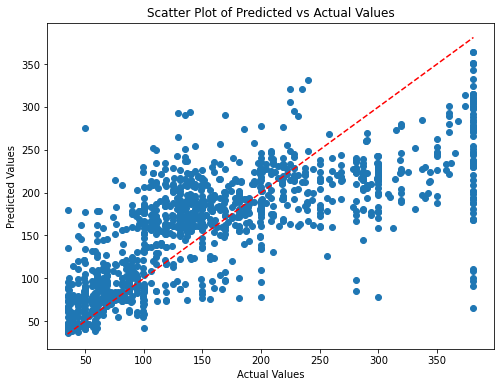

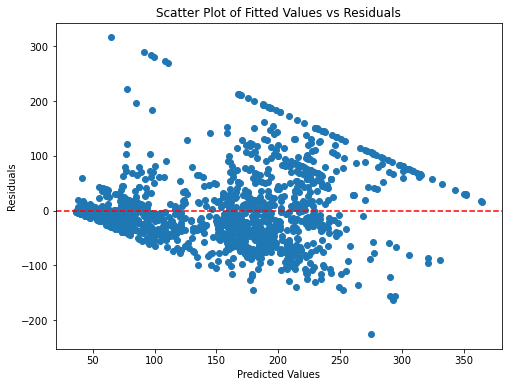

In [99]:
residuals = Y_test - rf_reg_gs1.predict(X_test_aRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_reg_gs1.predict(X_test_aRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_reg_gs1.predict(X_test_aRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Key findings:

- Comparing GS 1 with PF 1, it appears that both the train and test r^2 score had dropped, after using the best hyperparameters with the max_depth = 9. The train went from 0.72 to 0.698, and test went from 0.58 to 0.57. This indicates that the tuning efforts made in GS 1 were not effective in improving the model's ability to generalize to unseen data.
- The MSE scores had not much change.
- Although the difference between the r^2 scores reduced, from 0.138 (PF 1) to 0.124 (GS 1), it is a very slight difference. This marginal improvement seen in GS 1 is not worth the trade-off of lower overall performance indicated by decreased r^2 scores on both train and test sets.

Overall, the PF 1 model performs better in terms of R^2 scores on both training and testing sets and has a lower testing MSE compared to the GS 1 model.

Despite the initial finding that max_depth = 9 is optimal, further experimentation during the grid search process revealed that using this specific value within the grid search led to a decrease in model accuracy. This unexpected outcome suggests that the optimal value of max_depth may not generalize well to different parameter combinations or datasets.

#### Next steps:
I will be trying to reduce overfitting using GridSearch, and increase the test r^2. 

I will discard the idea of keeping max_depth at 9, and try to input a range of values for this parameter instead.

Additionally, I will add a wider range of values for some parameters.
- Increase n_estimators: Increasing the number of trees in the forest (n_estimators) may improve model performance, as it allows the model to learn more complex patterns in the data. 
- Increase min_samples_split and min_samples_leaf: Adjusting min_samples_split and min_samples_leaf can affect the tree's depth and complexity. Experiment with a wider range of values for these parameters to find the optimal balance between bias and variance.
- Increase max_features: The max_features parameter controls the number of features considered for splitting at each node. You can try different values such as 'auto', 'sqrt', or specific integers representing the number of features to consider. Also, consider adding more options to the max_features list to explore a broader range.

Add new parameters:
- Min Impurity Decrease (min_impurity_decrease): A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Increasing this parameter can lead to more conservative tree growth, potentially reducing overfitting.

### GridSearch 2 (GS 2)

In [100]:
# Define the parameter grid to search

# Create a base model
rf_reg = RandomForestRegressor(random_state=1)

param_grid = {
    'max_depth': [2, 3, 4, 5], #adjusted
    'n_estimators': [20, 40, 60], #adjusted, added 60
    'min_samples_split': [4, 5, 6, 8, 10], #increased
    'min_samples_leaf': [3, 4, 5, 7, 9], #increased
    'max_features': ['auto', 'sqrt'], #0.2
    'bootstrap': [True, False],
    'min_impurity_decrease': [0.0, 0.1, 0.15]  # explore more values
}

start_time = time.time()

# Instantiate the grid search
gs = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search
gs = gs.fit(X_train_aRemoved, Y_train.ravel())

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

# Print the best parameters found
print("Best Parameters:", gs.best_params_)

Total time taken: 7.56 minutes
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_impurity_decrease': 0.15, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 60}


In [101]:
rf_reg_gs2 = RandomForestRegressor( 
                             n_estimators=60,
                             max_depth=5, 
                             min_samples_leaf=3,
                             min_samples_split=4,                             
                             random_state=1,
                             bootstrap=True,
                             max_features='auto',
                             min_impurity_decrease= 0.15,
                             n_jobs=-1)

rf_reg_gs2.fit(X_train_aRemoved,Y_train.ravel())
print('training mse: ', mean_squared_error(rf_reg_gs2.predict(X_train_aRemoved), Y_train))
print('testing mse: ', mean_squared_error(rf_reg_gs2.predict(X_test_aRemoved), Y_test))


# Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, rf_reg_gs2.predict(X_train_aRemoved))
test_r2 = r2_score(Y_test, rf_reg_gs2.predict(X_test_aRemoved))
# Calculate the difference between train and test R^2 scores
r2_score_difference = train_r2 - test_r2

print('R^2 scores difference: ', r2_score_difference)
print('the training R^2 score is: ', train_r2)
print('the testing R^2 score is: ', test_r2)

training mse:  4772.529511134062
testing mse:  5028.064225053544
R^2 scores difference:  0.016497832555275593
the training R^2 score is:  0.491847386957296
the testing R^2 score is:  0.4753495544020204


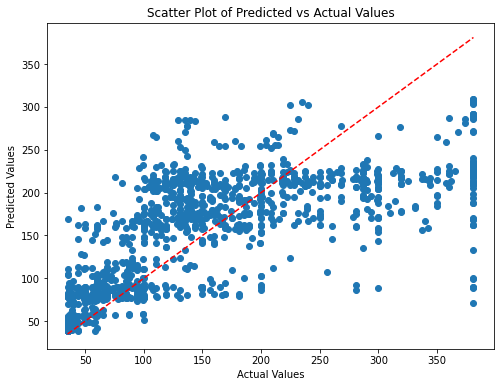

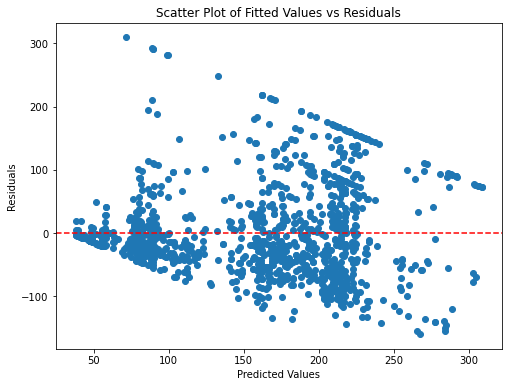

In [102]:
residuals = Y_test - rf_reg_gs2.predict(X_test_aRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_reg_gs2.predict(X_test_aRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_reg_gs2.predict(X_test_aRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Key findings:
- The train and test r^2 both dropped quite significantly, compared to PF 1 and GS 1 model. More importantly, the test r^2 plummeted from 0.58/0.57 (PF 1/GS 1) to a mere 0.47, indicating a deterioration in predictive performance.

- Furthermore, the train and test Mean Squared Error (MSE) metrics also exhibited an increase when compared to the other two models. This upward trend in MSE values suggests a decline in the model's accuracy and predictive capability.

- The only positive metric from this model is the fact that the difference between the train and test r^2 has decreased, from 0.1246 in GS 1, to 0.0164 in this model. This reduction indicates an improvement in addressing overfitting issues. 
- However, despite this positive aspect, the significant decline in both train and test accuracy metrics outweighs the benefits of mitigating overfitting.

#### Residual Plot:
- From this plot, it also shows worse performance compared to the previous tuning, as a slight downward trend is notable. 
- Because of the drop in train and test r-squared score, which means the abilit to predict has worsened, the residual plot reflects it.

#### Next Steps:

After 2 GS, I have figured that GS is not effective as has been difficult to increase the test score, and other methods could be used instead.

GridSearch is also very difficult to tune. It also takes up alot of time if I wish to add more range to the parameters (computational cost). 

- Hence, and I am going to try a more advanced method, which is Bayes Optimisation.

### Bayesian Optimisation 1 (BO 1)

In [103]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Create a base model
rf_reg = RandomForestRegressor(random_state=1)

# Define the search space
param_grid = {
    'max_depth': Integer(3, 15),
    'n_estimators': Integer(20, 100),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(2, 10),
    'max_features': Real(0.2, 1.0),  # Since max_features represents a fraction, use Real instead of Integer
    'bootstrap': [True, False],
    'min_impurity_decrease': Real(0.0, 0.4)  # Define the range for min_impurity_decrease as a real number
}

start_time = time.time()

# Instantiate the Bayesian optimization search
bayes_search = BayesSearchCV(
    estimator=rf_reg,
    search_spaces=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    n_iter=50,  # Number of iterations for the optimization process
    random_state=1  # Set a random state for reproducibility
)

# Perform Bayesian optimization search
bayes_search.fit(X_train_aRemoved, Y_train.ravel())

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

# Print the best parameters found
print("Best Parameters:", bayes_search.best_params_)

Total time taken: 2.16 minutes
Best Parameters: OrderedDict([('bootstrap', False), ('max_depth', 12), ('max_features', 0.6925395648829663), ('min_impurity_decrease', 0.00038042600518505313), ('min_samples_leaf', 7), ('min_samples_split', 2), ('n_estimators', 100)])


In [104]:
rf_reg_bo1 = RandomForestRegressor( 
                             n_estimators=100,
                             max_depth=12, 
                             min_samples_leaf=7,
                             min_samples_split=2,                             
                             random_state=1,
                             bootstrap=False,
                             max_features=0.6925,
                             min_impurity_decrease=0.0003804,
                             n_jobs=-1)

rf_reg_bo1.fit(X_train_aRemoved,Y_train.ravel())
print('training mse: ', mean_squared_error(rf_reg_bo1.predict(X_train_aRemoved), Y_train))
print('testing mse: ', mean_squared_error(rf_reg_bo1.predict(X_test_aRemoved), Y_test))
    
results  = cross_validate(rf_reg_bo1, X, Y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))

# Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, rf_reg_bo1.predict(X_train_aRemoved))
test_r2 = r2_score(Y_test, rf_reg_bo1.predict(X_test_aRemoved))
# Calculate the difference between train and test R^2 scores
r2_score_difference = train_r2 - test_r2

print('R^2 scores difference: ', r2_score_difference)
print('the training R^2 score: ', train_r2)
print('the testing R^2 score: ', test_r2)

training mse:  2192.985655995445
testing mse:  3758.6854925586467
cross val training mse: 2095.6707280461956
cross val testing mse: 4810.76595935789
R^2 scores difference:  0.1587008436269992
the training R^2 score:  0.7665029857103065
the testing R^2 score:  0.6078021420833073


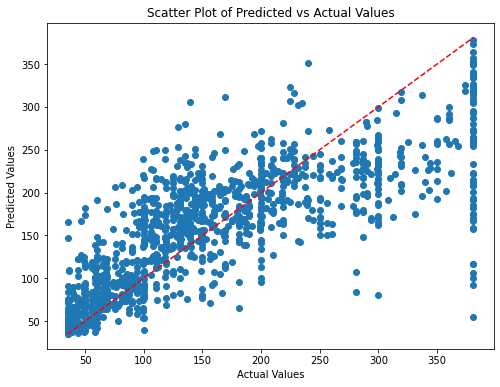

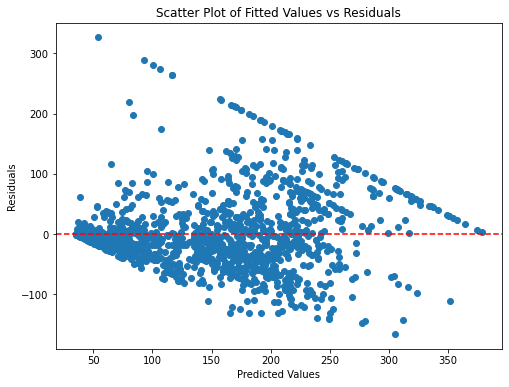

In [105]:
residuals = Y_test - rf_reg_bo1.predict(X_test_aRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_reg_bo1.predict(X_test_aRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_reg_bo1.predict(X_test_aRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Key Findings:

- BO 1 model has lower MSE for both training (2192.99) and testing (3758.69) compared to the GS 2 model (4772.53 for training and 5028.06 for testing), indicating better performance in terms of the average squared difference between predicted and actual values. Same goes for the cross validated MSE.
- BO 1 model has higher R^2 scores for both training (0.7665) and testing (0.6078) compared to the GS 2 model (0.4918 for training and 0.4753 for testing), suggesting that the BO 1 model explains a larger proportion of the variance in the target variable and fits the data better. 
- However, R^2 scores difference between training and testing sets is higher for the BO 1 model (0.1587) compared to the GS 2 model (0.0165), indicating a larger degree of overfitting in the BO 1 model.


### 2.4. Summarize Models

**Base Model:**
    
- training mse:  544.4172026951763
- testing mse:  3650.5286064526817
- the training R^2 score is:  0.9420334597220299
- the testing R^2 score is:  0.619087709639752
- R^2 scores difference:  0.3229457
    
**Base Model without 'near_amenities':**
    
- training mse:  548.1456166038348
- testing mse:  3568.021275094838
- the training R^2 score is:  0.9416364787781155
- the testing R^2 score is:  0.6276968892811541
- R^2 scores difference:  0.31393958949696144
    
**PF 1:**

- training mse:  2624.440611575936
- testing mse:  4005.0303136614534
- the training R^2 score is:  0.7205640423099644
- the testing R^2 score is:  0.5820974345900443
- R^2 scores difference:  0.13846660771992014
    
**GS 1:**

- training mse:  2833.2523643215636
- testing mse:  4085.6065292832677
- the training R^2 score is:  0.698330918859565
- the testing R^2 score is:  0.5736897561001908
- R^2 scores difference:  0.1246411627593742
    
**GS 2:**
    
- training mse:  4772.529511134063
- testing mse:  5028.064225053544
- the training R^2 score is:  0.49184738695729613
- the testing R^2 score is:  0.4753495544020204
- R^2 scores difference:  0.016497832555275704
    
**BO 1:**

- training mse:  2192.985655995445
- testing mse:  3758.6854925586467
- the training R^2 score is:  0.7665029857103065
- the testing R^2 score is:  0.6078021420833073
- R^2 scores difference:  0.1587008436269992

Comparing this all the models, BO 1 is the best one. As the metric that I am focusing on is the r^2 score to reduce overfitting and improve test score, it has the highest test r^2 compared to the other tunings. 

Even though the test R^2 is slightly lower than the base model (0.619) and the base model without the 'near_amenities' column (0.627), this one being 0.607, it has a lower difference in the train and test r^2 score, successfully improving overfitting and at the same time, not having the test accuracy to decrease too much. The slight decrease in test accuracy is the trade-off for better fitting. 

Additionally, even though the difference in the r^2 train and test score (0.1587) is higher compared to PF 1 (0.1385), GS 1 (0.1246), and GS 2 (0.016) tunings, it has actually reduced greatly from the base model (0.323) and the base model without the 'near_amenities' column (0.313). It reduced by almost half.

Hence, as the purpose of tuning this model is to reduce the overfitting and improve the test score if possible, the criteria has been met. Although the r^2 test score did not increase, it is not that far from the highest r^2 test score, being only at 0.627. The minor trade-off in the test score is deemed acceptable in exchange for the considerable improvement in mitigating overfitting.

### ANN - MLP Regressor

Cross Validated MSE will not be an evaluation metric for MLP Regressor as this model takes longer to load and may have alot of warnings

### Feature Importance - feature selection

In [106]:
# Instantiate
mlp = MLPRegressor(random_state  = 1)
mlp.fit(X_train,Y_train.ravel())

# Get the coefficients of the input layer to the first hidden layer
input_layer_weights = mlp.coefs_[0]

# Calculate feature importance as the absolute sum of the weights for each feature
feature_importances = np.abs(input_layer_weights).sum(axis=1)

# Create a pandas Series for better visualization
feature_importances_series = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

print(feature_importances_series)

room_type                         115.992245
number_of_reviews                  54.754796
minimum_nights                     54.411986
availability_365                   46.843704
reviews_per_month                  20.312691
name_length                        17.596429
calculated_host_listings_count     11.122267
near_amenities                      9.798494
neighbourhood                       6.379724
dtype: float64


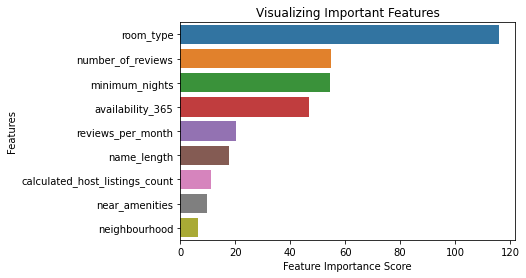

In [107]:
# Creating a seaborn bar plot

sns.barplot(x=feature_importances_series, y=feature_importances_series.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
plt.show()

In scikit-learn's MLPRegressor, there isn't a direct attribute like "feature_importances_" that you can use to get feature importances as you would with tree-based models like RandomForestRegressor. However, you can still infer feature importance indirectly by examining the coefficients of the input layer to the first hidden layer. These coefficients represent the weights assigned to each feature in the neural network.

### Base Model without neighbourhood

In [108]:
X_train_nRemoved = X_train.drop(columns=['neighbourhood'])
X_test_nRemoved = X_test.drop(columns=['neighbourhood'])

In [109]:
mlp = MLPRegressor(max_iter=1000, random_state  = 1) 
 #max_iter added to avoid having converge warning; This allows the optimization algorithm more time to converge.
mlp.fit(X_train_nRemoved,Y_train.ravel())

MLPRegressor(max_iter=1000, random_state=1)

In [110]:
print('training mean squared error: ', mean_squared_error(mlp.predict(X_train_nRemoved), Y_train))
print('testing mean squared error: ', mean_squared_error(mlp.predict(X_test_nRemoved), Y_test))

#Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, mlp.predict(X_train_nRemoved))
test_r2 = r2_score(Y_test, mlp.predict(X_test_nRemoved))

print('the training R^2 score is: ', train_r2)
print('the testing R^2 score is: ', test_r2)

training mean squared error:  5332.149716397495
testing mean squared error:  5363.141907864634
the training R^2 score is:  0.432262114838458
the testing R^2 score is:  0.4403860679133599


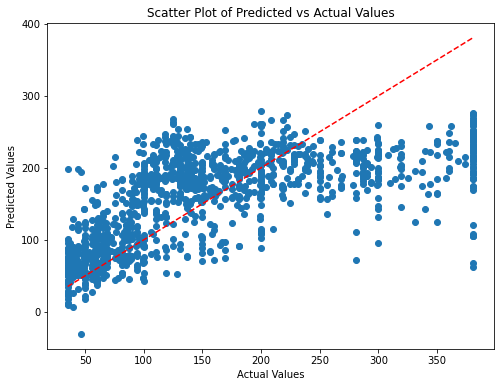

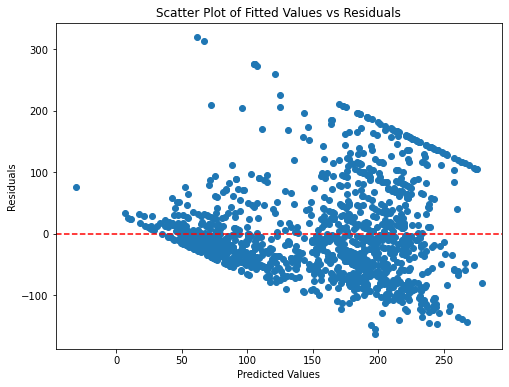

In [111]:
residuals = Y_test - mlp.predict(X_test_nRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, mlp.predict(X_test_nRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(mlp.predict(X_test_nRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Key Findings:
Base Model:
training mean squared error:  5994.866250025579
testing mean squared error:  5971.7384633450665
the training R^2 score is:  0.36169971444175697
the testing R^2 score is:  0.3768824132799897
R^2 difference: 0.0015 

Base Model (with max_iterations increased and removed column):
training mean squared error:  5332.149716397495
testing mean squared error:  5363.141907864634
the training R^2 score is:  0.432262114838458
the testing R^2 score is:  0.4403860679133599
R^2 difference: 0.0078 

- The R^2 score has increased from 0.36 to 0.43, and 0.37 to 0.44, for the train and test respectively, indicating better goodness-of-fit compared to the base model.
- The train and test MSE have also reduced. The modified base model shows improvements in both training and testing MSE compared to the base model, indicating that it performs better in terms of prediction accuracy.
- Even though the R^2 difference have increased slightly, it is still acceptable as it is low.

#### Plots:

- Comparing these plots to the base model, there is not much difference
- More values align along the diagonal line compared to the base model's plot. This alignment suggests that the predictions are closer to the actual values, indicating improved model performance.
- The improvement in alignment along the diagonal line can be attributed to the removal of the least important column. Dropping this column likely helped reduce noise or irrelevant information in the dataset, allowing the model to focus on more relevant features and patterns related to the target variable. As a result, the model's predictions become more accurate and closer to the actual values, leading to a clearer alignment along the diagonal line in the predicted versus actual values plot.

#### Next Steps:
I will try to improve the model to help increase the train and test R^2 scores, and reduce the train and test MSE. This will be done by using RandomSearch, so that I can input a higher number of parameters, as RandomSearch is faster than GridSearch.

### RandomSearch 1 (RS 1)

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
from scipy.stats import randint, uniform
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,), (25,), (30,)],  # Sizes of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions suitable for regression
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'max_iter': [200, 400, 500, 600, 700, 1000, 2000],  # Maximum number of iterations
    'alpha': uniform(0.0001, 0.02),  # L2 regularization parameter
}

# Measure start time
start_time = time.time()

# Create an MLPRegressor instance
mlp_reg = MLPRegressor(random_state=1)

# Instantiate the random search
random_search = RandomizedSearchCV(estimator=mlp_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=1, n_jobs=-1)
# Perform the random search
random_search.fit(X_train_nRemoved, Y_train.ravel())

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Total time taken: 0.34 minutes
Best Parameters: {'activation': 'tanh', 'alpha': 0.019465231514387952, 'hidden_layer_sizes': (30,), 'max_iter': 2000, 'solver': 'sgd'}


In [114]:
mlp_rs = MLPRegressor(max_iter=2000,
                      activation='tanh',
                      solver='sgd',
                      alpha=0.019465231514387952,
                      hidden_layer_sizes=(30,),
                      random_state  = 1) 

mlp_rs.fit(X_train_nRemoved,Y_train.ravel())
print('training mse: ', mean_squared_error(mlp_rs.predict(X_train_nRemoved), Y_train))
print('testing mse: ', mean_squared_error(mlp_rs.predict(X_test_nRemoved), Y_test))

#Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, mlp_rs.predict(X_train_nRemoved))
test_r2 = r2_score(Y_test, mlp_rs.predict(X_test_nRemoved))

print('training R^2 score is: ', train_r2)
print('testing R^2 score is: ', test_r2)

score_diff = train_r2 - test_r2
print(f'Train and Test Score Difference (R^2):\n{score_diff}')

training mse:  5042.666721014018
testing mse:  5182.078629738638
training R^2 score is:  0.46308466715424
testing R^2 score is:  0.4592790106639516
Train and Test Score Difference (R^2):
0.0038056564902884116


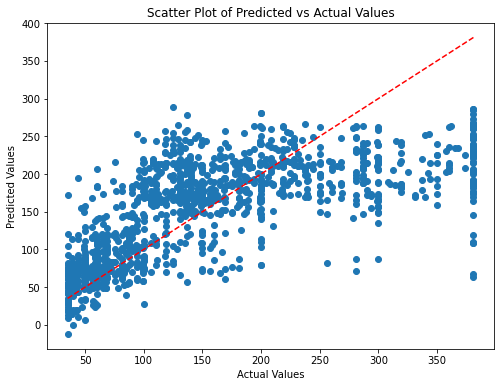

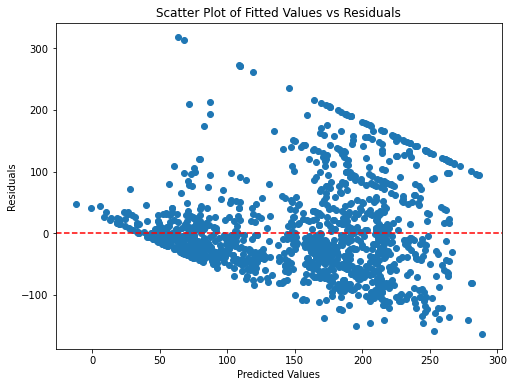

In [115]:
residuals = Y_test - mlp_rs.predict(X_test_nRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, mlp_rs.predict(X_test_nRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(mlp_rs.predict(X_test_nRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Key findings:

The use of RandomSearch has proven to be effective here. Not only is it faster than gridsearch, it managed to give me result that improved the train and test MSE and R^2 score.
- Comparing to the previous tuning where I removed the 'neighbourhood' column, both train and test R^2 score has increased, indicating that the model's ability to explain the variance in the target variable has improved. It went from 0.432 to 0.463 for train, and 0.44 to 0.459 for test. These higher R^2 scores signify that the model is capturing more of the underlying patterns in the data, resulting in better predictive performance on both the training and testing datasets.
- Moreover, the difference between the training and testing R^2 scores has reduced from 0.008 to 0.0038. This reduction suggests that the model's generalization performance has improved, as the gap between its performance on the training and testing datasets has narrowed. A smaller difference between these scores indicates that the model is exhibiting less overfitting and is better able to generalize to unseen data.
- The train and test MSE has also dropped from around 5300 to 5100. This reduction in MSE indicates that the model's predictions are closer to the actual values, reflecting improved accuracy in predicting the target variable. 

#### Plots:
- Examining the plots, there is still not much difference from the previous one.
- A very slight improvement can be seen from the predicted vs actual values scatter plot, where a bit more data are along the line, but it is difficult to see any significant improvement.

#### Next Steps:
I will be using GridSearch now, as RandomSearch may have skipped the optimal hyperparameters. Although GridSearch takes longer, it may be able to get better hyperparameter combinations to improve the test accuracy. Parameter values are modified and adjusted based on the best hyperparameters given in this tuning.
- Modify the parameter values based on the best hyperparameters given here

### GridSearch 1 (GS 1)

In [116]:
# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(20,), (25,), (30,), (35,)],  # Adjusted Sizes of hidden layers since the best is (30,) 
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Solvers for weight optimization
    'max_iter' : [200, 2000], 
    'alpha': [0.005, 0.01]  # Modified of alpha values
}

# Measure start time
start_time = time.time()

# Create an MLPRegressor instance
mlp_reg = MLPRegressor(random_state=1)

# Instantiate the grid search
grid_search = GridSearchCV(estimator=mlp_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Perform the grid search
grid_search.fit(X_train_nRemoved, Y_train.ravel())

# Measure end time
end_time = time.time()

# Calculate total time in minutes
total_time_minutes = (end_time - start_time) / 60

print("Total time taken: {:.2f} minutes".format(total_time_minutes))

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Total time taken: 5.41 minutes
Best Parameters: {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (35,), 'max_iter': 200, 'solver': 'sgd'}


In [117]:
mlp_gs1 = MLPRegressor(max_iter=200,
                      activation='tanh',
                      solver='sgd',
                      alpha=0.005,
                      hidden_layer_sizes=(35,),
                      random_state  = 1) 

mlp_gs1.fit(X_train_nRemoved,Y_train.ravel())
print('training mse: ', mean_squared_error(mlp_gs1.predict(X_train_nRemoved), Y_train))
print('testing mse: ', mean_squared_error(mlp_gs1.predict(X_test_nRemoved), Y_test))

#Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, mlp_gs1.predict(X_train_nRemoved))
test_r2 = r2_score(Y_test, mlp_gs1.predict(X_test_nRemoved))

print('training R^2 score is: ', train_r2)
print('testing R^2 score is: ', test_r2)

score_diff = train_r2 - test_r2
print(f'Train and Test Score Difference (R^2):\n{score_diff}')

training mse:  4901.035893735689
testing mse:  5355.998539979633
training R^2 score is:  0.4781647362875958
testing R^2 score is:  0.4411314384926103
Train and Test Score Difference (R^2):
0.03703329779498554


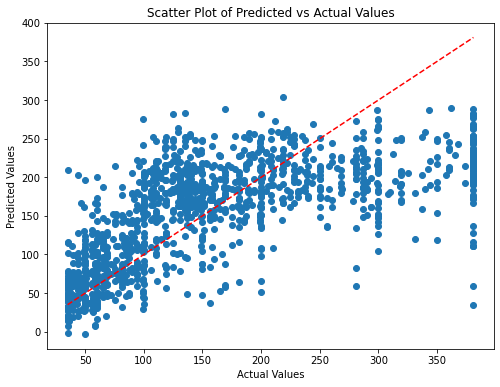

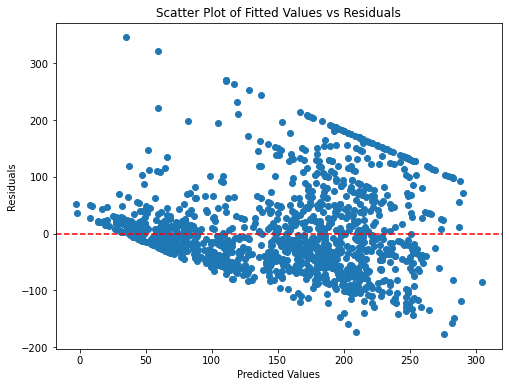

In [118]:
residuals = Y_test - mlp_gs1.predict(X_test_nRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, mlp_gs1.predict(X_test_nRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(mlp_gs1.predict(X_test_nRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion:

Because MLP takes longer, I was unable to put alot of different hyperparameter combinations at it would take too long. Because of this, the best hyperparameters shown was not effective in improving the model predictions.

- Althought the train MSE reduced compared to the previous tuning (RS 1), which is a good sign, the test MSE increased. This resulted in a greater difference between the train and test MSE, suggesting the model worsened.
- Furthermore, even though the train R^2 increased slightly, from 0.463 (RS 1) to 0.478 here, the test R^2 is the more important one, which actually decreased. It went from 0.468 in RS 1, to 0.441 here. 
- Because of the increase in train results, but decrease in test results (for both MSE and R^2), the difference between the train and test also increased. 
- This tuning resulted in the greatest difference between the train and test R^2 score.

#### Next Steps:
GridSearch was tried, but they were taking too long, costly. 

Hence, although tedious, I will try to input the parameters manually based of the best hyperparameters provided in the Random Search model until the results improve.

### Manual Input 1

In [119]:
mlp_test = MLPRegressor(max_iter=1700,
                      activation='tanh',
                      solver='sgd',
                      alpha=0.3,
                      hidden_layer_sizes=(50,),
                      random_state  = 1) 

mlp_test.fit(X_train_nRemoved,Y_train.ravel())
print('training mse: ', mean_squared_error(mlp_test.predict(X_train_nRemoved), Y_train))
print('testing mse: ', mean_squared_error(mlp_test.predict(X_test_nRemoved), Y_test))

#Calculate R^2 score for training and testing sets
train_r2 = r2_score(Y_train, mlp_test.predict(X_train_nRemoved))
test_r2 = r2_score(Y_test, mlp_test.predict(X_test_nRemoved))

print('training R^2 score is: ', train_r2)
print('testing R^2 score is: ', test_r2)

score_diff = train_r2 - test_r2
print(f'Train and Test Score Difference (R^2):\n{score_diff}')

training mse:  4887.454719094545
testing mse:  5097.234391443433
training R^2 score is:  0.4796107848381571
testing R^2 score is:  0.4681320335044715
Train and Test Score Difference (R^2):
0.011478751333685588


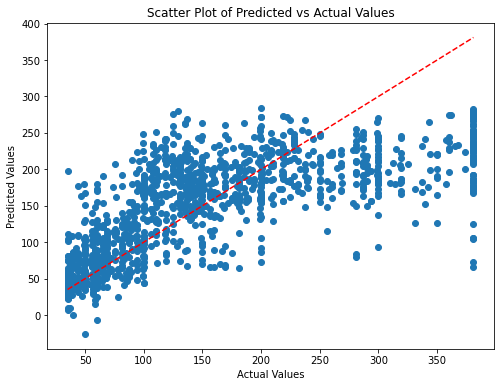

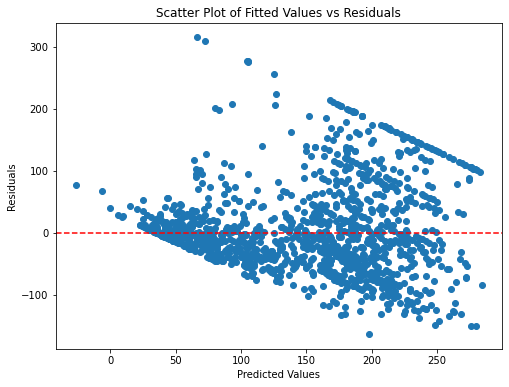

In [120]:
residuals = Y_test - mlp_test.predict(X_test_nRemoved)

# Create scatter plot of predicted values versus actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, mlp_test.predict(X_test_nRemoved))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

# Create scatter plot of fitted values (predictions) versus residuals
plt.figure(figsize=(8, 6))
plt.scatter(mlp_test.predict(X_test_nRemoved), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Fitted Values vs Residuals')
plt.show()

### Conclusion / Key Findings

Although it took some time to experiment by inputting different values manually, it did not that that long for me to find a hyperparameter combination to increase the train and test R^2 score, which is the goal of tuning this model.

- Compared to the previous tuning (GS 1), I have managed to achieve better train and test MSE and R^2.
- This MI 1 model has lower MSE for both training (4887.45) and testing (5097.23) compared to the GS 1 model (4901.04 for training and 5356.00 for testing), indicating slightly better performance in terms of the average squared difference between predicted and actual values.
- As for the R^2 score, the test R^2 increased from 0.441 (GS 1) to 0.468 here. Similarly, the train R^2 increased slightly, from 0.478 (GS 1) to 0.4796. 
- Not only did the train and test scores improve, meaning that the model is predicting better, the difference in train and test R^2 also dropped, from 0.037 in GS 1, to 0.0114 in this model. 

Hence, this tuning is a better model than the previous tuning.

### 2.4. Summarize Models

All Model tunings:

**Base Model**:
- training mse:  5994.866250025579
- testing mse:  5971.7384633450665
- training R^2 score:  0.36169971444175697
- testing R^2 score:  0.3768824132799897
- Train and Test Score Difference (R^2): 0.0152

**Base without Neighbourhood:**
- training mse:  5332.149716397495
- testing mse:  5363.141907864634
- training R^2 score: 0.432262114838458
- testing R^2 score: 0.4403860679133599
- Train and Test Score Difference (R^2): 0.008

**RS 1:**
- training mse:  5042.666721014018
- testing mse:  5182.078629738638
- training R^2 score: 0.46308466715424
- testing R^2 score: 0.4592790106639516
- Train and Test Score Difference (R^2): 0.0038056564902884116

**GS 1:**
- training mse:  4901.035893735689
- testing mse:  5355.998539979633
- training R^2 score: 0.4781647362875958
- testing R^2 score: 0.4411314384926103
- Train and Test Score Difference (R^2): 0.03703329779498554

**MI 1:**
- training mse: 4887.454719094545
- testing mse: 5097.234391443433
- training R^2 score: 0.4796107848381571
- testing R^2 score: 0.4681320335044715
- Train and Test Score Difference (R^2): 0.011478751333685588

In conclusion, the model with the best test R^2 score is MI 1, at 0.468, followed by RS 1 (0.459), then GS 1 (0.441), followed closely by Base Model without 'neighbourhood' column (0.440), and lastly, the Base Model (0.376). 

In order to determine the best tuning, I would look at the difference in the train and test R^2 score as well, where the lower the value, the better. A smaller difference suggests that the model is not overfitting to the training data and is capturing the underlying patterns in the data rather than memorizing it.

The lowest difference is RS 1, with only 0.0038 difference. This is followed by Base without Neighbourhood column (0.008), then MI 1 (0.011), then the Base Model (0.015), and lastly, GS 1 (0.037). 

From this, the best model would be MI 1, as it has the highest test R^2 score, and also a decent train test R^2 difference. Although it does not have the best difference, it is not considered high enough to be an overfitted model. The slightly higher difference is the trade-off needed for the highest test score. While the other models have lower difference, like RS 1 and Base Model without 'neighbourhood' column, their train and test R^2 and MSE metrics shows that they do not perform as well as MI 1.

Therefore, MI 1 stands out as the optimal choice, striking a fine balance between test performance and generalization ability. Its slightly higher train-test R^2 difference is acceptable considering its superior test R^2 score and overall performance metrics.